# Netflix Case Study

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Reading the data
data_url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv'
df = pd.read_csv(data_url)
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
## checking number of NaN values in each column
for i in df.columns:
  print(i, ':' ,df[i].isna().sum())

show_id : 0
type : 0
title : 0
director : 2634
cast : 825
country : 831
date_added : 10
release_year : 0
rating : 4
duration : 3
listed_in : 0
description : 0


In [ ]:
pd.reset_option('display.max_rows')
df.head()
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

##### The above result shows that in the rating column there are some entries (last three) which belongs to duration column. We need to shift these entries to duration column.

In [ ]:
## Below code finds the index of NaN values in duration column and then replaces these NaN values to corresponding row index of rating column.
## This was done to enter the duration which was mistakenly entered in rating column.
df.loc[df['duration'].isna(), 'duration'] = df.loc[df['duration'].isna(), 'duration'].fillna(df['rating'])
df['duration']

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [ ]:
df['duration'].isna().sum()

0

In [ ]:
## When we entered the entries from rating to duration column in the abive code block, these rows now have identical entries.
## Now we have to replace these entries in the rating column with something else. There were also some null values in th erating column
## To make it readable for ML models we will place NaN values with not rated (NR). the same will be filled in place of the entries which were rongly filled with entries of duration column.
## The below code put 2 condition, 1. where rating column equals duration column, or 2. rating column is Null in the rating column, and fill it with 'NR'.

df.loc[(df['rating'] == df['duration']) | (df['rating'].isna()),'rating'] = 'NR'
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            87
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df1 = df.explode('listed_in')
df1.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

##### in the above column, I was trying to separate each zenre to separate rows using explode function. However, it did not succeed. The reason might be that the entries is not a list which is necessary to aoply explode function. we will check whether all the required column where I have  to use explode function is in proper format i.e. is in list format.

### **Separating multiple select type columns (i.e. column having multiple vvalues within the cell)**

In [ ]:
## checks whether all the rows in this column is list
df['director'].apply(lambda x: isinstance(x, list)).all()

False

In [ ]:
## checks whether any rows in this column is list
df['director'].apply(lambda x: isinstance(x, list)).any()

False

In [ ]:
## checks whether all the rows in this column is string
df['director'].apply(lambda x: isinstance(x, str)).all()

False

In [ ]:
## checks whether ant of rows in this column is string
df['director'].apply(lambda x: isinstance(x, str)).any()

True

In [ ]:
## row wise opeartion for converting the string into a list type.
## if the rows in this column is not null then it first split the directors names based on separator ',' and converts it into a list.
df['director'] = df['director'].apply(lambda x: x if pd.isna(x) else x.split(',')).tolist()

In [ ]:

df['director'].apply(lambda x: isinstance(x, list)).any()

True

In [ ]:
## creates a new row for each item in a single row.
df = df.explode('director')
df.shape

(9612, 12)

In [ ]:
df['cast'].apply(lambda x: isinstance(x, list)).any()

False

In [ ]:
## similar to director column, it converts entries of cast column to list type.
df['cast'] = df['cast'].apply(lambda x: x.split(',') if pd.notna(x) else x).tolist()

In [ ]:
df = df.explode('cast')
df.shape

(70812, 12)

In [ ]:
df.head()

show_id     type                 title         director             cast  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson              NaN   
1      s2  TV Show         Blood & Water              NaN       Ama Qamata   
1      s2  TV Show         Blood & Water              NaN      Khosi Ngema   
1      s2  TV Show         Blood & Water              NaN    Gail Mabalane   
1      s2  TV Show         Blood & Water              NaN   Thabang Molaba   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13     90 min   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   
1  International TV Shows, TV Dramas, TV Mysteries   
1  International TV Shows, TV Dramas, TV Mysteries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
1  After crossing paths at a party, a Cape Town t...  
1  After crossing paths at a party, a Cape Town t...  
1  After crossing paths at a party, a Cape Town t...

In [ ]:
df['country'].isna().sum()

5421

In [ ]:
df['country'] = df['country'].apply(lambda x: x.split(',') if pd.notna(x) else x).tolist()
df = df.explode('country')
df.shape

(89415, 12)

In [ ]:
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',') if pd.notna(x) else x).tolist()
df = df.explode('listed_in')
df.shape

(202065, 12)

### **Substituting null values with appropriate values in each required column**

In [ ]:
for i in df.columns:
  print(i, ':', df[i].isna().sum())

show_id : 0
type : 0
title : 0
director : 50643
cast : 2149
country : 11897
date_added : 158
release_year : 0
rating : 0
duration : 0
listed_in : 0
description : 0


In [ ]:
df.head(2)

show_id     type                 title         director        cast  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson         NaN   
1      s2  TV Show         Blood & Water              NaN  Ama Qamata   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13     90 min   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                listed_in                                        description  
0           Documentaries  As her father nears the end of his life, filmm...  
1  International TV Shows  After crossing paths at a party, a Cape Town t...

In [ ]:
## replacing null values with Unknown director for ML models readbility
df['director']  = df['director'].fillna('Unknown director')
df['director'].isna().sum()

0

In [ ]:
## replacing null values with Unknown actor for ML models readbility
df['cast'].replace(np.nan, 'Unknown actor', inplace = True)
df['cast'].isna().sum()

0

In [ ]:
for i in df.columns:
  print(i, ' :', df[i].isna().sum())

show_id  : 0
type  : 0
title  : 0
director  : 0
cast  : 0
country  : 11897
date_added  : 158
release_year  : 0
rating  : 0
duration  : 0
listed_in  : 0
description  : 0


##### Now it remain only two columns country and date added with null values.

1. for date added, first we will try to fill it with mode year deciding in combination with release year

2. Similary mode will be used for country to fill as much values as possible by analysing it with director and actor columns.

we will understand the process below:

In [ ]:
df.head(2)

show_id     type                 title          director           cast  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  Unknown actor   
1      s2  TV Show         Blood & Water  Unknown director     Ama Qamata   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13     90 min   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                listed_in                                        description  
0           Documentaries  As her father nears the end of his life, filmm...  
1  International TV Shows  After crossing paths at a party, a Cape Town t...

In [ ]:
for i in df[df['date_added'].isnull()]['release_year'].sort_values().unique():
  imp_val = df[df['release_year'] == i]['date_added'].mode().values[0]
  df.loc[df['release_year'] == i, 'date_added'] = df.loc[df['release_year'] == i, 'date_added'].fillna(imp_val)

df['date_added'].isna().sum()

0

IN the above code block,
1. first, all the unique values of release year were fetched in the first row.

2. second, for all these uniques release years, mode of date added were found, using the date added column corresponding to these fetched unique release year.

3. all the nan values in date added were replaced by

This will help find the mode of date added based on the only those release years which corresponded to nan values. e.g suppose corresponding unique release years for all the nan date added are 2011, 2012, and 2013. Then the code above  will find mode of date added cooresponde to not nan values in date added and fill it for nan vlaues correspond to 2011 release year nan values.


In [ ]:
## same reasoing have been applied to fill teh nan vlaues of director column
#first it checks with resoect to director
for i in df[df['country'].isnull()]['director'].unique():
  if i in df[~df['country'].isnull()]['director'].unique():
    imp_coun = df[df['director'] == i]['country'].mode().values[0]
    df.loc[df['director'] == i, 'country'] = df.loc[df['director'] == i, 'country'].fillna(imp_coun)

In [ ]:
df['country'].isnull().sum()

4673

In [ ]:
# the remaining nan country after fiiling it as per directors column, it repeats the process wrt cats column.
for i in df[df['country'].isnull()]['cast'].unique():
  if i in df[~df['country'].isnull()]['cast'].unique():
    imp_cast = df[df['cast'] == i]['country'].mode().values[0]
    df.loc[df['cast'] == i, 'country'] = df.loc[df['cast']==i, 'country'].fillna(imp_cast)

In [ ]:
df['country'].isna().sum()

2455

In [ ]:
## if there is still misising some values, then it replace those nan vlaues with missing country.
df['country'].fillna('Missing_country', inplace = True)

In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.head(2)

show_id     type                 title          director           cast  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  Unknown actor   
1      s2  TV Show         Blood & Water  Unknown director     Ama Qamata   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13     90 min   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                listed_in                                        description  
0           Documentaries  As her father nears the end of his life, filmm...  
1  International TV Shows  After crossing paths at a party, a Cape Town t...

#### the code blocks below tries to convert the duration of movies in the duration column in bin format i.e. 0-30 minutes, 30-60 minutes.

In [ ]:
df['duration'] = df['duration'].str.replace('min', '')

In [ ]:
df['duration_copy'] = df['duration'].copy()

In [ ]:
df.loc[df['duration_copy'].str.contains('Season'), 'duration_copy'] = 0

In [ ]:
df.head()

show_id     type                 title          director           cast  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  Unknown actor   
1      s2  TV Show         Blood & Water  Unknown director     Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown director     Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown director     Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown director    Khosi Ngema   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13        90    
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                listed_in                                        description  \
0           Documentaries  As her father nears the end of his life, filmm...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   
1               TV Dramas  After crossing paths at a party, a Cape Town t...   
1            TV Mysteries  After crossing paths at a party, a Cape Town t...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   

  duration_copy  
0           90   
1             0  
1             0  
1             0  
1             0

In [ ]:
df['duration_copy'] = df['duration_copy'].astype(int)

In [ ]:
df['duration_copy'].dtype

dtype('int64')

In [ ]:
df.loc[df['duration_copy'] != 0, 'duration_copy'].describe()

count    145917.000000
mean        106.839724
std          24.709594
min           3.000000
25%          93.000000
50%         104.000000
75%         119.000000
max         312.000000
Name: duration_copy, dtype: float64

In [ ]:
df.loc[df['duration_copy'] != 0, 'duration_copy'].describe()

count    145917.000000
mean        106.839724
std          24.709594
min           3.000000
25%          93.000000
50%         104.000000
75%         119.000000
max         312.000000
Name: duration_copy, dtype: float64

In [ ]:
df.shape

(202065, 13)

In [ ]:
import math as math
1 + 3.322*math.log(202065)

41.58269711599218

<Axes: xlabel='duration_copy', ylabel='Density'>

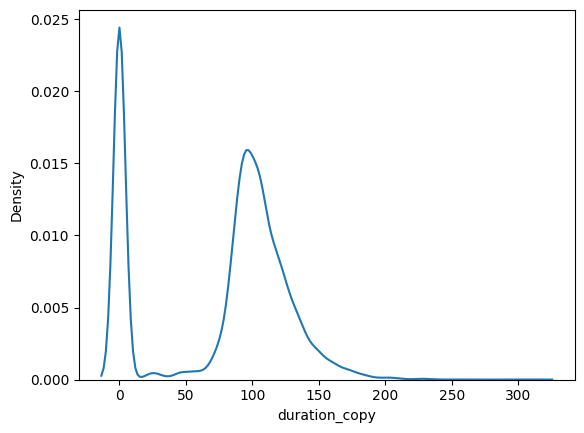

In [ ]:
sns.kdeplot(df['duration_copy'])

In [ ]:
bins1 = [-1,1,30,60,90,120,150,180,330]
labels1 = [ 'zero','less than 30', '30-60', '60-90', '90-120', '120-150','150-180', '180-330']

In [ ]:
df['duration_copy'] = pd.cut(df['duration_copy'], bins = bins1, labels = labels1)
df.head()

show_id     type                 title          director           cast  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  Unknown actor   
1      s2  TV Show         Blood & Water  Unknown director     Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown director     Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown director     Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown director    Khosi Ngema   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13        90    
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                listed_in                                        description  \
0           Documentaries  As her father nears the end of his life, filmm...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   
1               TV Dramas  After crossing paths at a party, a Cape Town t...   
1            TV Mysteries  After crossing paths at a party, a Cape Town t...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   

  duration_copy  
0         60-90  
1          zero  
1          zero  
1          zero  
1          zero

In [ ]:
df.loc[~df['duration'].str.contains('Season'), 'duration'] = df.loc[~df['duration'].str.contains('Season'), 'duration_copy']

In [ ]:
df.head()

show_id     type                 title          director           cast  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  Unknown actor   
1      s2  TV Show         Blood & Water  Unknown director     Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown director     Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown director     Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown director    Khosi Ngema   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13      60-90   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                listed_in                                        description  \
0           Documentaries  As her father nears the end of his life, filmm...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   
1               TV Dramas  After crossing paths at a party, a Cape Town t...   
1            TV Mysteries  After crossing paths at a party, a Cape Town t...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   

  duration_copy  
0         60-90  
1          zero  
1          zero  
1          zero  
1          zero

In [ ]:
df.drop('duration_copy',axis = 1, inplace  = True)

In [ ]:
df.head()

show_id     type                 title          director           cast  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  Unknown actor   
1      s2  TV Show         Blood & Water  Unknown director     Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown director     Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown director     Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown director    Khosi Ngema   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13      60-90   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                listed_in                                        description  
0           Documentaries  As her father nears the end of his life, filmm...  
1  International TV Shows  After crossing paths at a party, a Cape Town t...  
1               TV Dramas  After crossing paths at a party, a Cape Town t...  
1            TV Mysteries  After crossing paths at a party, a Cape Town t...  
1  International TV Shows  After crossing paths at a party, a Cape Town t...

In [ ]:
## parsing date added column into datetime format to extract
from datetime import datetime
from dateutil.parser import parse

parsed_dt = []
for i in df['date_added']:
  parsed_dt.append(parse(i).strftime('%Y-%m-%d'))

df['new_date_added'] = parsed_dt
df['new_date_added'] = pd.to_datetime(df['new_date_added'])

In [ ]:
df['Week_Added']=df['new_date_added'].dt.isocalendar().week
df['Month_added'] = df['new_date_added'].dt.month
df['Year_added'] = df['new_date_added'].dt.year
df.head()


show_id     type                 title          director           cast  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  Unknown actor   
1      s2  TV Show         Blood & Water  Unknown director     Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown director     Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown director     Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown director    Khosi Ngema   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13      60-90   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                listed_in                                        description  \
0           Documentaries  As her father nears the end of his life, filmm...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   
1               TV Dramas  After crossing paths at a party, a Cape Town t...   
1            TV Mysteries  After crossing paths at a party, a Cape Town t...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   

  new_date_added  Week_Added  Month_added  Year_added  
0     2021-09-25          38            9        2021  
1     2021-09-24          38            9        2021  
1     2021-09-24          38            9        2021  
1     2021-09-24          38            9        2021  
1     2021-09-24          38            9        2021

In [ ]:
df['country'] = df['country'].str.strip()
df['listed_in'] = df['listed_in'].str.strip()

## **Univariate Analysis**

In [ ]:
type_counts = df.groupby(['type']).agg({'show_id':'nunique'}).reset_index()
type_counts

type  show_id
0    Movie     6131
1  TV Show     2676

In [ ]:
plt.gcf().get_size_inches()

array([6.4, 4.8])

<Figure size 640x480 with 0 Axes>

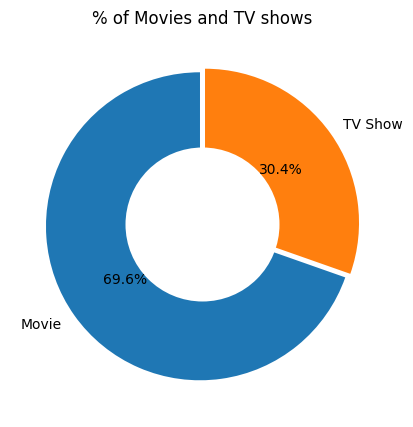

In [ ]:
plt.figure(figsize = (5,5))
plt.pie(type_counts['show_id'], labels = type_counts['type'], autopct='%1.1f%%', explode = (0.02, 0.02), startangle = 90)
plt.title('% of Movies and TV shows')
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0,0), 0.5, fc = 'white'))
plt.show()

#### About **3rd forth** (about 72%) of the total content are movies. 28% of the contents are TV shows.

In [ ]:
director = df.groupby(['director']).agg({'title':'nunique'}).reset_index().sort_values(by = ['title', 'director'], ascending = [False, True])[:15]
director = director[director['director'] != 'Unknown director']
director

director  title
4020        Rajiv Chilaka     22
261             Jan Suter     18
4067          Raúl Campos     18
3235         Marcus Raboy     16
4651          Suhas Kadav     16
2450            Jay Karas     15
1382  Cathy Garcia-Molina     13
2447          Jay Chapman     12
3306      Martin Scorsese     12
5075      Youssef Chahine     12
4626     Steven Spielberg     11
1792     Don Michael Paul     10
1663         David Dhawan      9
4461      Shannon Hartman      9

In [ ]:
plt.gcf().get_size_inches()

array([6.4, 4.8])

<Figure size 640x480 with 0 Axes>

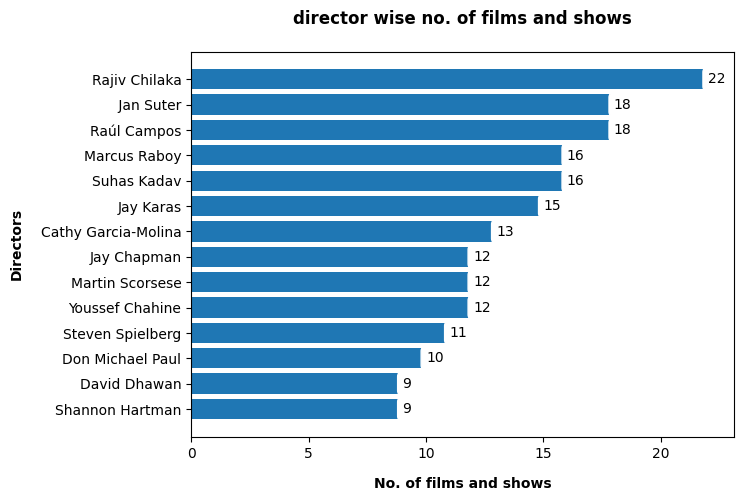

In [ ]:
plt.figure(figsize = (7, 5))
plt.barh(director['director'][::-1], director['title'][::-1])
for i, value in enumerate(director['title'][::-1]):
    plt.text(value, i, str(value), ha='left', va='center', bbox = dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.35'))

plt.title('director wise no. of films and shows', fontweight = 'bold', pad = 20)
plt.xlabel('No. of films and shows', fontweight = 'bold', labelpad = 12)
plt.ylabel('Directors', fontweight = 'bold', labelpad = 12)
plt.show()

#### The graph shows top 15 directors in terms of no. of movies and TV shows among the contents on the Netflix.  Cummulatively for movies and TV shows and for all country, Rajiv chilaka has the most no. of movies or TV shows on Netflix followe by jan sutar, raul campos, Marcus Raboy, and Suhas Kadav.

In [ ]:
cast = df.groupby(['cast']).agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:20]
cast = cast[cast['cast'] != 'Unknown actor']
cast

cast  title
2612         Anupam Kher     39
26941       Rupa Bhimani     31
30303   Takahiro Sakurai     30
15541      Julie Tejwani     28
23624            Om Puri     27
25410        Rajesh Kava     26
38445     Shah Rukh Khan     26
4186         Boman Irani     25
23956       Paresh Rawal     25
33367          Yuki Kaji     25
1905       Andrea Libman     25
32293       Vincent Tong     24
14162     Jigna Bhardwaj     23
34037       Akshay Kumar     23
15656     Junichi Suwabe     21
10150    Fred Tatasciore     21
34168   Amitabh Bachchan     20
22504   Naseeruddin Shah     20
33948       Adam Sandler     20

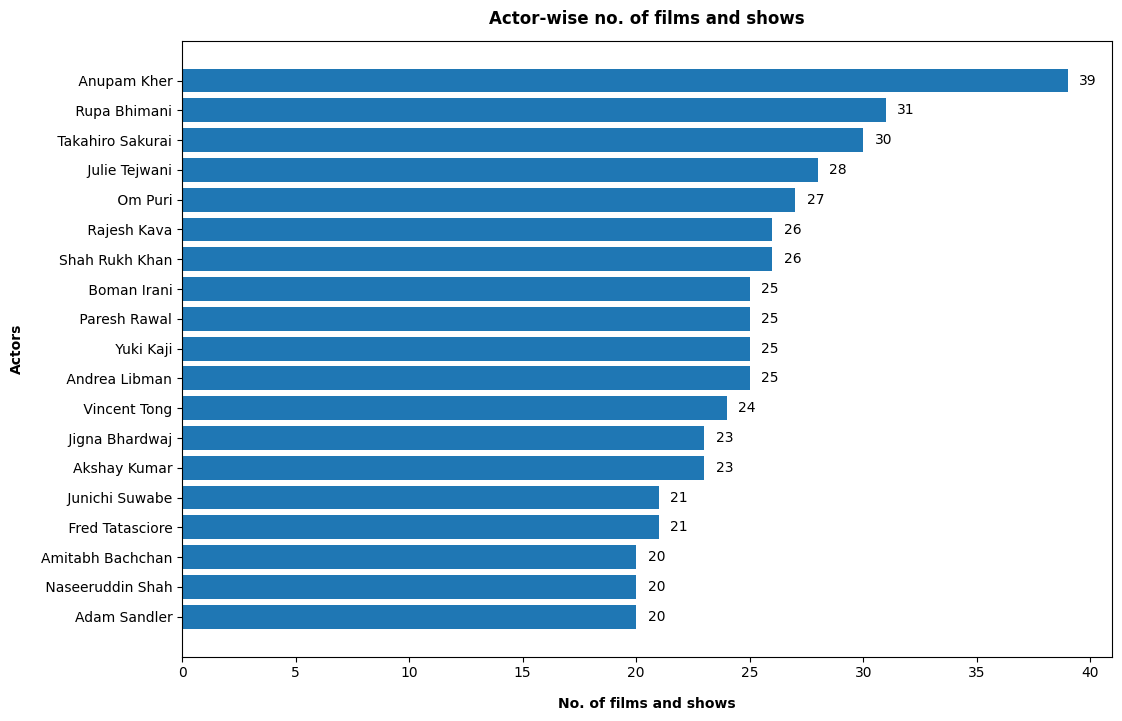

In [ ]:
plt.figure(figsize = (12,8))
plt.barh(cast['cast'][::-1], cast['title'][::-1])

for i, value in enumerate(cast['title'].values[::-1]):
  plt.text(value + 0.5, i, str(value), ha = 'left', va = 'center')

plt.title('Actor-wise no. of films and shows', fontweight = 'bold', pad = 12)
plt.xlabel('No. of films and shows', fontweight = 'bold', labelpad = 12)
plt.ylabel('Actors', fontweight = 'bold', labelpad = 12)
plt.show()

#### The graph shows top 15 Actors in terms of no. of movies and TV shows among the contents on the Netflix. Across countries for TV shows and movies cummulatively, Anupam Kher has the most content on Netflix followed by Rupa Bhimani, Takahiro sakurai, Julie tejwani, and Om Puri.


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'new_date_added', 'Week_Added', 'Month_added', 'Year_added'],
      dtype='object')

In [ ]:
countries = df.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:20]
countries

country  title
117    United States   4249
46             India   1131
116   United Kingdom    829
21            Canada    459
37            France    412
54             Japan    337
104            Spain    240
102      South Korea    234
39           Germany    233
69   Missing_country    200
68            Mexico    171
24             China    166
7          Australia    161
79           Nigeria    139
34             Egypt    133
112           Turkey    117
43         Hong Kong    108
16            Brazil    103
52             Italy    102
47         Indonesia     97

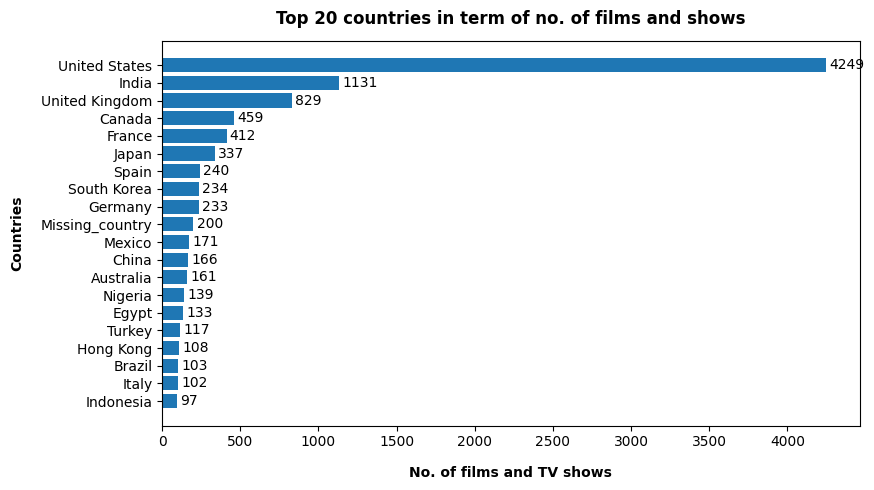

In [ ]:
plt.figure(figsize = (9,5))
plt.barh(countries['country'][::-1], countries['title'][::-1])
for i, value in enumerate(countries['title'].values[::-1]):
  plt.text(value + 20, i, str(value), ha = 'left', va = 'center')

plt.title('Top 20 countries in term of no. of films and shows', fontweight = 'bold', pad = 12)
plt.xlabel('No. of films and TV shows', fontweight = 'bold', labelpad = 12)
plt.ylabel('Countries', fontweight = 'bold', labelpad = 12)
plt.show()

#### Among the movies and shows on netflix contnet from United States comes on top with a total of 4249 movies and TV series followed by India with 1131 fims and shows. UK, canada, and France were 3rd, 4th and 5th in terms of no. of movies and TV shows on Netflix.

In [ ]:
release_year = df.groupby(['release_year']).agg({'title': 'nunique'}).reset_index().sort_values(by = ['release_year', 'title'], ascending = [False, False] )
release_year

release_year  title
73          2021    592
72          2020    953
71          2019   1030
70          2018   1147
69          2017   1032
..           ...    ...
4           1945      4
3           1944      3
2           1943      3
1           1942      2
0           1925      1

[74 rows x 2 columns]

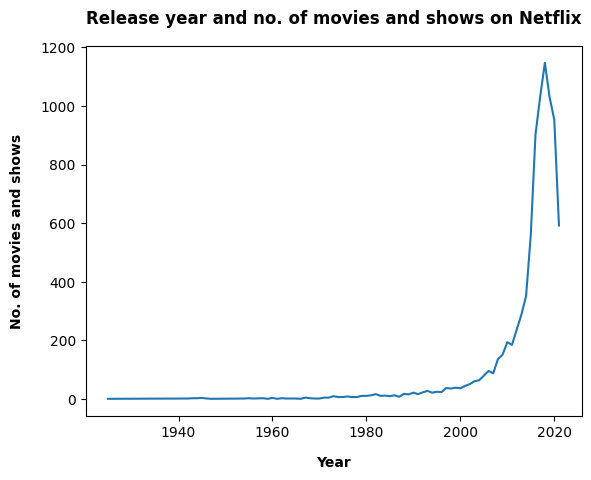

In [ ]:
plt.plot(release_year['release_year'], release_year['title'])

plt.title('Release year and no. of movies and shows on Netflix', fontweight = 'bold', pad = 16)
plt.xlabel('Year', fontweight = 'bold', labelpad = 12)
plt.ylabel('No. of movies and shows', fontweight = 'bold', labelpad = 12 )
plt.show()

#### A very few content release prior to 2000 is on Netflix.The contents realeased relaesed in 2018 is highest among content on Netflix.

In [ ]:
rating = df.groupby(['rating']).agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)
rating

rating  title
8      TV-MA   3207
6      TV-14   2160
9      TV-PG    863
5          R    799
4      PG-13    490
11     TV-Y7    334
10      TV-Y    307
3         PG    287
7       TV-G    220
2         NR     87
0          G     41
12  TV-Y7-FV      6
1      NC-17      3
13        UR      3

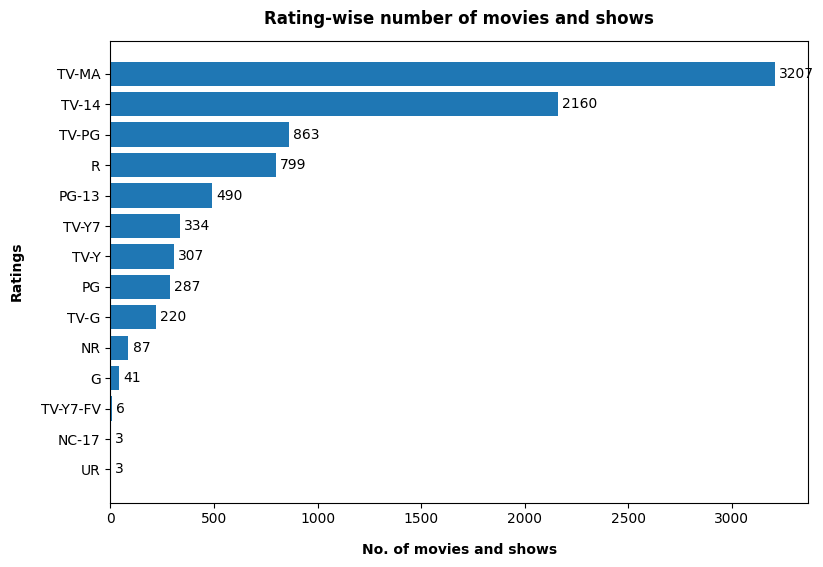

In [ ]:
plt.figure(figsize = (9,6))
plt.barh(rating['rating'][::-1], rating['title'][::-1])

for i, value in enumerate(rating['title'].values[::-1]):
  plt.text(value + 20, i, str(value), ha = 'left', va = 'center')

plt.title('Rating-wise number of movies and shows', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies and shows', fontweight = 'bold', labelpad = 12)
plt.ylabel('Ratings', fontweight = 'bold', labelpad = 12)
plt.show()

#### Most of the content on Netflix correspondes to rating TV-MA followed by TV-14, TV-PG and R. This signals about the focus audience type of Netflix.   

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'new_date_added', 'Week_Added', 'Month_added', 'Year_added'],
      dtype='object')

In [ ]:
duration = df.groupby(['duration']).agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)
duration

duration  title
20        90-120   2996
0       1 Season   1793
16         60-90   1506
4        120-150    897
10     2 Seasons    425
12         30-60    357
11     3 Seasons    199
7        150-180    198
21  less than 30    130
13     4 Seasons     95
14     5 Seasons     65
9        180-330     47
15     6 Seasons     33
17     7 Seasons     23
18     8 Seasons     17
19     9 Seasons      9
1     10 Seasons      7
5     13 Seasons      3
6     15 Seasons      2
3     12 Seasons      2
2     11 Seasons      2
8     17 Seasons      1

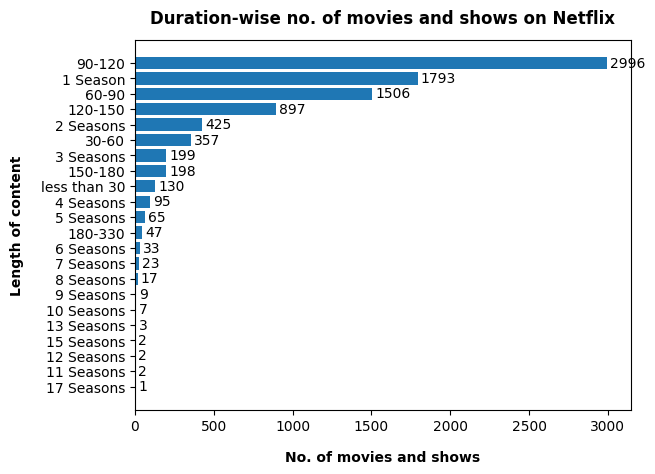

In [ ]:
plt.barh(duration['duration'][::-1], duration['title'][::-1])
for i, value in enumerate(duration['title'].values[::-1]):
  plt.text(value+20, i, str(value), ha = 'left', va = 'center')

plt.title('Duration-wise no. of movies and shows on Netflix', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies and shows', fontweight = 'bold', labelpad = 12)
plt.ylabel('Length of content', fontweight = 'bold', labelpad = 12)
plt.show()

#### Movies below 2 hrs long is the majority in Netflix contents. among TV series, series having one season are the most in number on the Netflix.

In [ ]:
Genre = df.groupby('listed_in').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title')[:15]
Genre

listed_in  title
38                      TV Shows     16
5              Classic & Cult TV     28
31  Stand-Up Comedy & Talk Shows     56
39                  TV Thrillers     57
21                        Movies     57
13          Faith & Spirituality     65
40                 Teen TV Shows     69
9                    Cult Movies     71
1                 Anime Features     71
35                     TV Horror     75
37           TV Sci-Fi & Fantasy     84
27           Science & Nature TV     92
36                  TV Mysteries     98
20                  LGBTQ Movies    102
6                 Classic Movies    116

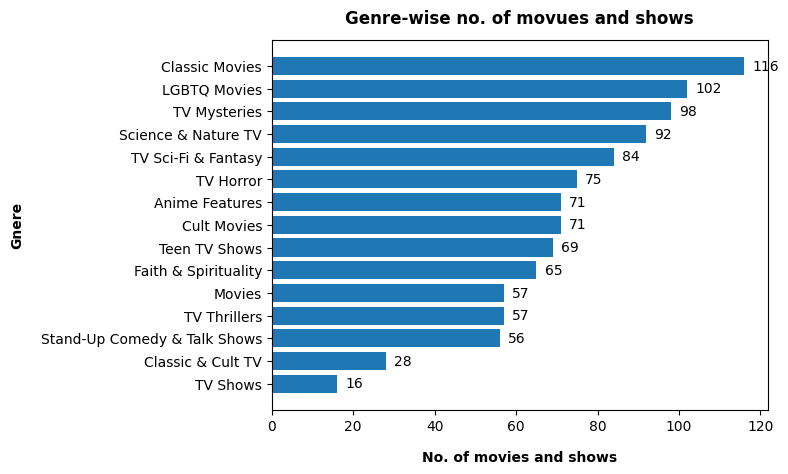

In [ ]:
plt.barh(Genre['listed_in'], Genre['title'])
for i, value in enumerate(Genre['title'].values):
  plt.text(value+2, i, str(value), ha = 'left', va = 'center')

plt.title('Genre-wise no. of movues and shows', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies and shows', fontweight = 'bold', labelpad = 12)
plt.ylabel('Gnere', fontweight = 'bold', labelpad = 12)
plt.show()

#### Top most genre in terms of number of movies and shows on netflix is Classical movies, followed by LGBTQ movies. 3rd and 4th place of Genre in terms of no. are TV mystries, Science and Nature TV, and TV Sci-Fi & Fantasy.

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'new_date_added', 'Week_Added', 'Month_added', 'Year_added'],
      dtype='object')

In [ ]:
week = df.groupby('Week_Added').agg({'title':'nunique'}).reset_index().sort_values(by = ['Week_Added'])
week

Week_Added  title
0            1    372
1            2    108
2            3    113
3            4     88
4            5    208
5            6     97
6            7    147
7            8    110
8            9    254
9           10    135
10          11    163
11          12    109
12          13    250
13          14    173
14          15    153
15          16    160
16          17    154
17          18    234
18          19    116
19          20    131
20          21    117
21          22    206
22          23    151
23          24    164
24          25    143
25          26    271
26          27    241
27          28    131
28          29    140
29          30    160
30          31    269
31          32    122
32          33    153
33          34    143
34          35    265
35          36    142
36          37    183
37          38    139
38          39    166
39          40    287
40          41    116
41          42    135
42          43    116
43          44    318
44          45     98
45          46    134
46          47    120
47          48    200
48          49    140
49          50    189
50          51    137
51          52    132
52          53    104

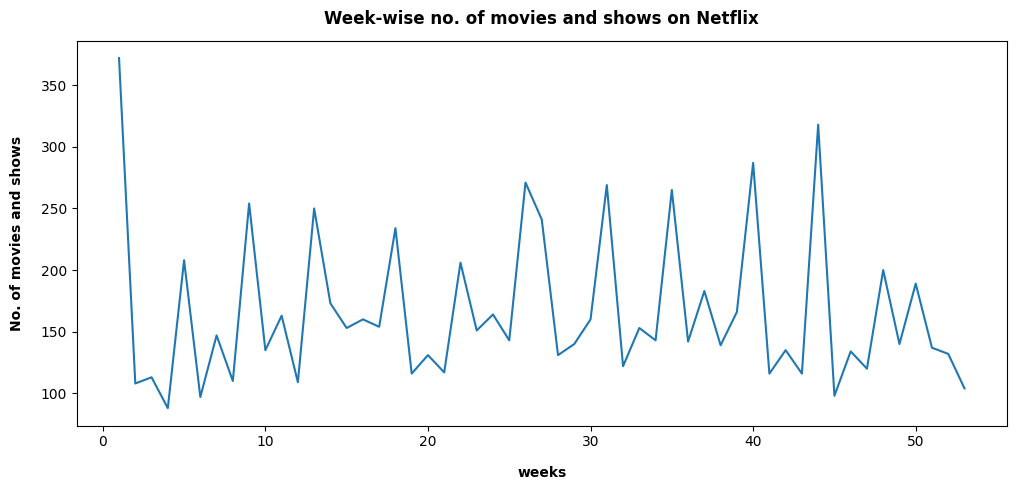

In [ ]:
plt.figure(figsize = (12,5))
plt.plot(week['Week_Added'], week['title'])
plt.title('Week-wise no. of movies and shows on Netflix', fontweight = 'bold', pad = 12)
plt.xlabel('weeks', fontweight = 'bold', labelpad = 12)
plt.ylabel('No. of movies and shows', fontweight = 'bold', labelpad = 12)
plt.show()

#### week 1 of the new year marks the highest no. of content added to the Netflix. weekwise trend of adding content is cyclical in nature. however, in general it seems that a considerable number of content is added in every 4-5 weeks.

In [ ]:
month = df.groupby(['Month_added']).agg({'title': 'nunique'}).reset_index().sort_values(by = 'Month_added')
month

Month_added  title
0             1    738
1             2    563
2             3    742
3             4    765
4             5    632
5             6    728
6             7    832
7             8    756
8             9    772
9            10    760
10           11    706
11           12    813

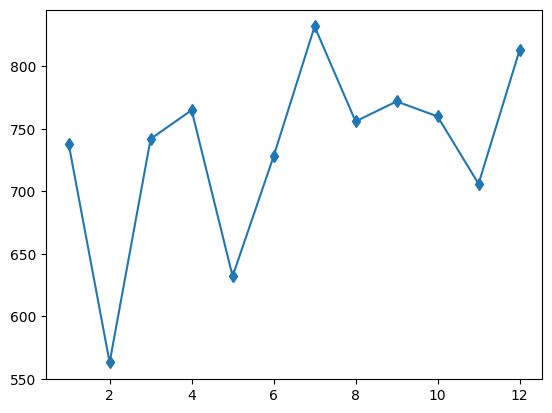

In [ ]:
plt.plot(month['Month_added'], month['title'], marker = 'd')
plt.show()

#### Monthly trend fro all the years shows that 7 july months marks the highest number of content added. The second highest number of contents were added in months of decemeber.
#### except Feburary and May, a considerable no. of movies were added  every month. However, Most number of contnet were added in the 7th month of the year, july.

In [ ]:
df['actor_director'] = df.cast.str.cat(df.director, sep = ' and ')
df = df[df['cast'] != 'Unknown actor']
df = df[df['director'] != 'Unknown director']
df.head()

show_id     type      title         director           cast country  \
2      s3  TV Show  Ganglands  Julien Leclercq  Sami Bouajila  France   
2      s3  TV Show  Ganglands  Julien Leclercq  Sami Bouajila  France   
2      s3  TV Show  Ganglands  Julien Leclercq  Sami Bouajila  France   
2      s3  TV Show  Ganglands  Julien Leclercq   Tracy Gotoas  France   
2      s3  TV Show  Ganglands  Julien Leclercq   Tracy Gotoas  France   

           date_added  release_year rating  duration               listed_in  \
2  September 24, 2021          2021  TV-MA  1 Season          Crime TV Shows   
2  September 24, 2021          2021  TV-MA  1 Season  International TV Shows   
2  September 24, 2021          2021  TV-MA  1 Season   TV Action & Adventure   
2  September 24, 2021          2021  TV-MA  1 Season          Crime TV Shows   
2  September 24, 2021          2021  TV-MA  1 Season  International TV Shows   

                                         description new_date_added  \
2  To protect his family from a powerful drug lor...     2021-09-24   
2  To protect his family from a powerful drug lor...     2021-09-24   
2  To protect his family from a powerful drug lor...     2021-09-24   
2  To protect his family from a powerful drug lor...     2021-09-24   
2  To protect his family from a powerful drug lor...     2021-09-24   

   Week_Added  Month_added  Year_added                     actor_director  
2          38            9        2021  Sami Bouajila and Julien Leclercq  
2          38            9        2021  Sami Bouajila and Julien Leclercq  
2          38            9        2021  Sami Bouajila and Julien Leclercq  
2          38            9        2021   Tracy Gotoas and Julien Leclercq  
2          38            9        2021   Tracy Gotoas and Julien Leclercq

In [ ]:
actor_director = df.groupby('actor_director').agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:20]
actor_director.head()

actor_director  title
19869    Julie Tejwani and Rajiv Chilaka     19
31993      Rajesh Kava and Rajiv Chilaka     19
34086     Rupa Bhimani and Rajiv Chilaka     18
17920   Jigna Bhardwaj and Rajiv Chilaka     18
48376     Vatsal Dubey and Rajiv Chilaka     16

Text(0.5, 1.0, 'Top actor director combination')

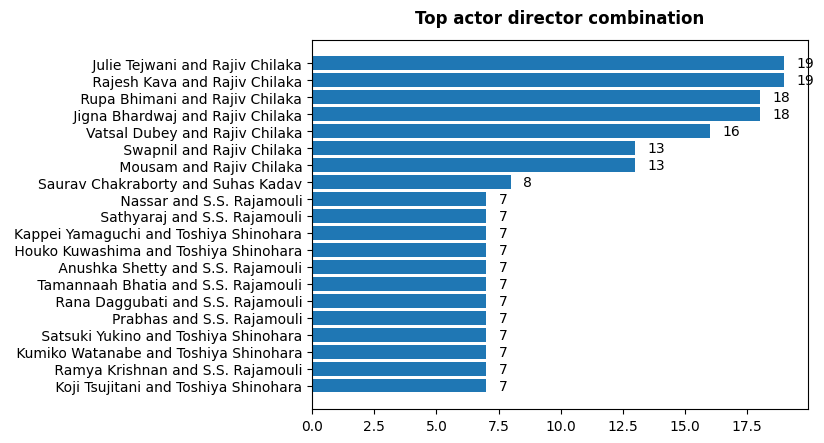

In [ ]:
plt.barh(actor_director['actor_director'][::-1], actor_director['title'][::-1])

for i, value in enumerate(actor_director['title'][::-1]):
  plt.text(value +0.5, i, str(value), ha = 'left', va = 'center')

plt.title('Top actor director combination', fontweight = 'bold', pad = 12)

#### Graph above shows the actor director combination and corresponding no. of contents on Neflix.  Julie Tejwani; Rajiv Chilaka and Rajesh Kava; Rajiv Chilaka has the most no. of contents on Netflix.

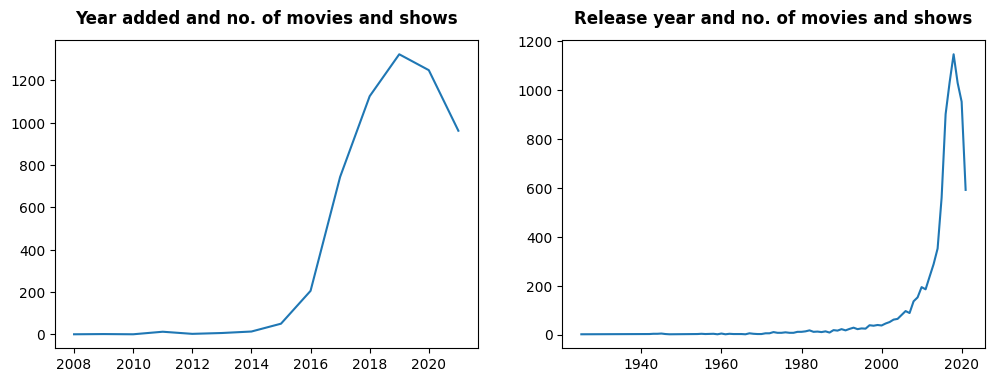

In [ ]:
year_added = df.groupby('Year_added')['title'].nunique().reset_index().sort_values(by = 'Year_added')
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(year_added['Year_added'], year_added['title'])
plt.title('Year added and no. of movies and shows', fontweight = 'bold', pad = 12)

plt.subplot(1,2,2)
plt.plot(release_year['release_year'], release_year['title'])
plt.title('Release year and no. of movies and shows', fontweight = 'bold', pad = 12)

plt.show()

#### contents on Netflix appears to significantly increase since 2015. After 2014 a the no. of contents increased multifold compared to previous. However, after 2015, the increase is very stark. In the year 2019, highest number of contnet were added on the platform.

#### contents released in the year 2019 is highest among Netfix content. contents released prior to 2000 are very minimal

<Figure size 1500x600 with 0 Axes>

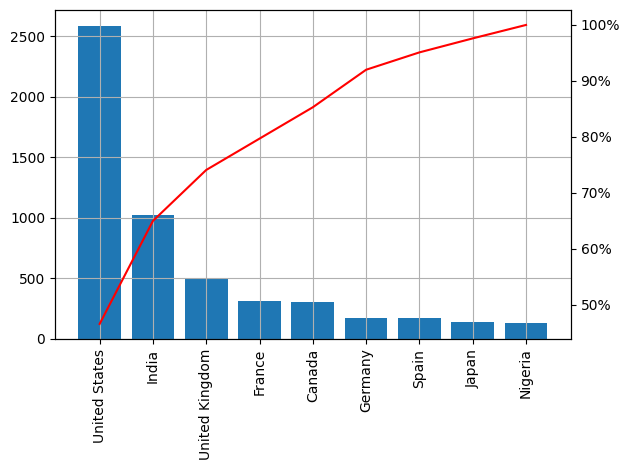

In [ ]:
from matplotlib.ticker import PercentFormatter
movies = df.groupby('country').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:10]
movies['cumpercent'] = round((movies['title'].cumsum()/movies['title'].sum())*100,1)
movies = movies[movies['country'] != 'Missing_country']
plt.figure(figsize = (15,6))
fig, ax = plt.subplots()
ax.bar(movies['country'], movies['title'])
ax.grid(True)
plt.xticks(rotation = 90)

ax2 = ax.twinx()
ax2.plot(movies['country'], movies['cumpercent'], color = 'red')
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.tight_layout()

plt.show()




#### from the above pareto chart, it is clear that about 80% of the conetnt on netflix are from six countries namely, US, India, UK, Canada. In the next section, analysis based on these countries will be attempted to explore the further country wise trends.  

# **Descriptive analysis for movies and TV shows separately**

In [ ]:
df.head(2)


show_id     type      title         director           cast country  \
2      s3  TV Show  Ganglands  Julien Leclercq  Sami Bouajila  France   
2      s3  TV Show  Ganglands  Julien Leclercq  Sami Bouajila  France   

           date_added  release_year rating  duration               listed_in  \
2  September 24, 2021          2021  TV-MA  1 Season          Crime TV Shows   
2  September 24, 2021          2021  TV-MA  1 Season  International TV Shows   

                                         description new_date_added  \
2  To protect his family from a powerful drug lor...     2021-09-24   
2  To protect his family from a powerful drug lor...     2021-09-24   

   Week_Added  Month_added  Year_added                     actor_director  
2          38            9        2021  Sami Bouajila and Julien Leclercq  
2          38            9        2021  Sami Bouajila and Julien Leclercq

## **Univariate Analysis for Movies and TV Shows on Netflix separaetly for the four identified countries.**

In [ ]:
df_movies = df[df['type'] == 'Movie']
df_shows = df[df['type'] == 'TV Show']

In [ ]:
movies_country = df_movies.groupby('country').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:11]
movies_country = movies_country[movies_country['country'] != 'Missing_country']

shows_country = df_shows.groupby('country').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:11]
shows_country = shows_country[shows_country['country'] != 'Missing_country']

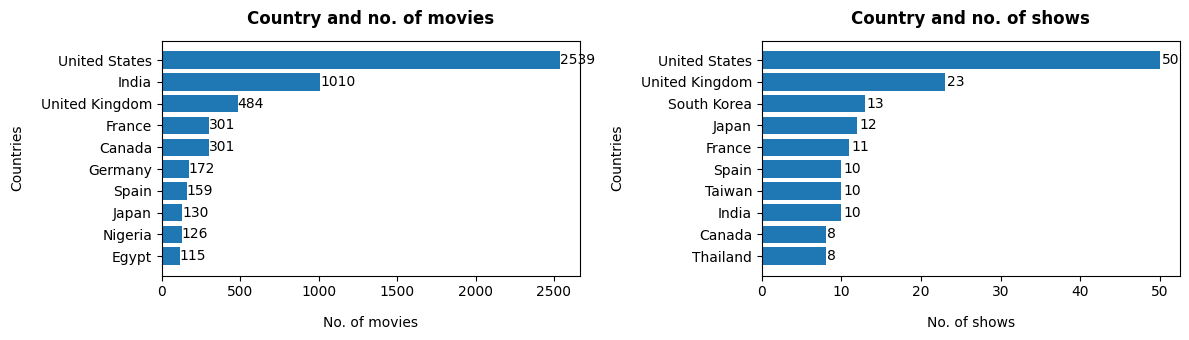

In [ ]:
plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
plt.barh(movies_country['country'][::-1], movies_country['title'][::-1])
for i, value in enumerate(movies_country['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Country and no. of movies', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Countries', labelpad = 12)

plt.subplot(1,2,2)
plt.barh(shows_country['country'][::-1], shows_country['title'][::-1])
for i, value in enumerate(shows_country['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Country and no. of shows', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Countries', labelpad = 12)

plt.tight_layout()
plt.show()

In [ ]:
df_movies = df[df['type'] == 'Movie']
df_shows = df[df['type'] == 'TV Show']
df_movies_US = df_movies[df_movies['country'] == 'United States']
df_shows_US = df_shows[df_shows['country'] == 'United States']

df_movies_IND = df_movies[df_movies['country'] == 'India']
df_shows_IND = df_shows[df_shows['country'] == 'India']

df_movies_UK = df_movies[df_movies['country'] == 'United Kingdom']
df_shows_UK = df_shows[df_shows['country'] == 'United Kingdom']

df_movies_Can = df_movies[df_movies['country'] == 'Canada']
df_shows_Can = df_shows[df_shows['country'] == 'Canada']


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'new_date_added', 'Week_Added', 'Month_added', 'Year_added',
       'actor_director'],
      dtype='object')

In [ ]:
movies_director_US = df_movies_US.groupby('director').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:11]
movies_director_US = movies_director_US[movies_director_US['director'] != 'Unknown director']

shows_director_US = df_shows_US.groupby('director').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:11]
shows_director_US = shows_director_US[shows_director_US['director'] != 'Unknown director']

movies_director_IND = df_movies_IND.groupby('director').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:11]
movies_director_IND = movies_director_IND[movies_director_IND['director'] != 'Unknown director']

shows_director_IND = df_shows_IND.groupby('director').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:11]
shows_director_IND = shows_director_IND[shows_director_IND['director'] != 'Unknown director']

movies_director_UK = df_movies_UK.groupby('director').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:11]
movies_director_UK = movies_director_UK[movies_director_UK['director'] != 'Unknown director']

shows_director_UK = df_shows_UK.groupby('director').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:11]
shows_director_UK = shows_director_UK[shows_director_UK['director'] != 'Unknown director']

movies_director_Can = df_movies_Can.groupby('director').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:11]
movies_director_Can = movies_director_Can[movies_director_Can['director'] != 'Unknown director']

shows_director_Can = df_shows_Can.groupby('director').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:11]
shows_director_Can = shows_director_Can[shows_director_Can['director'] != 'Unknown director']

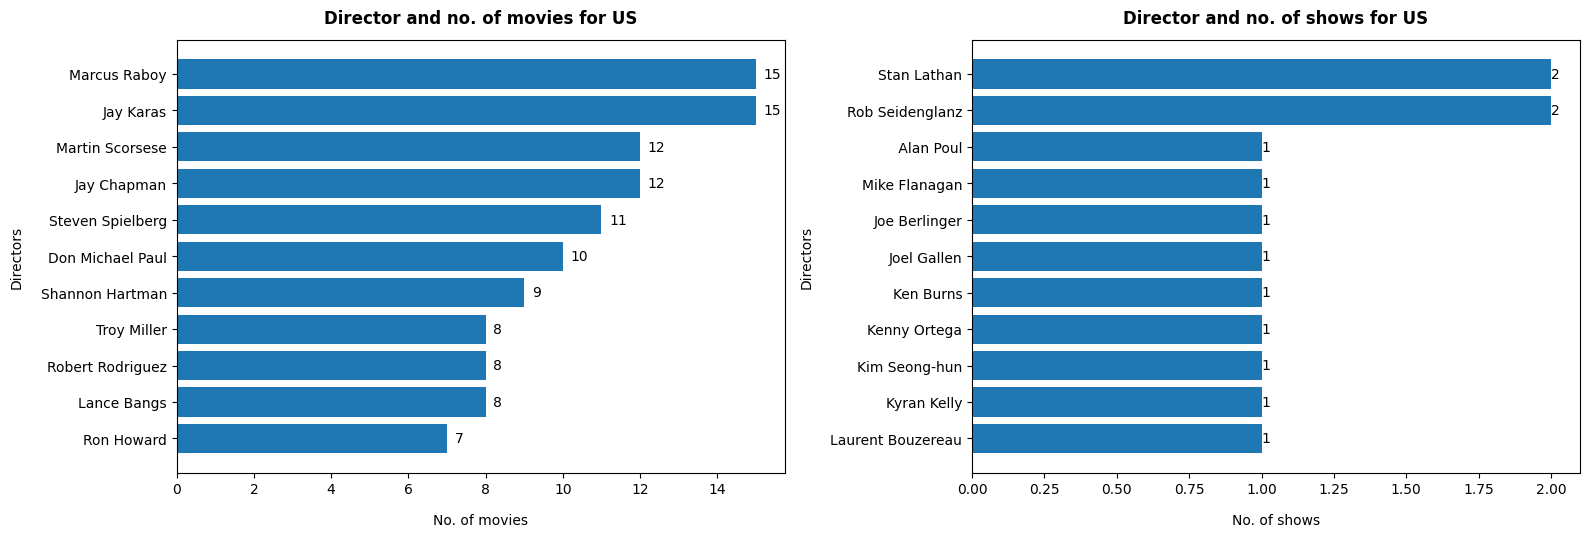

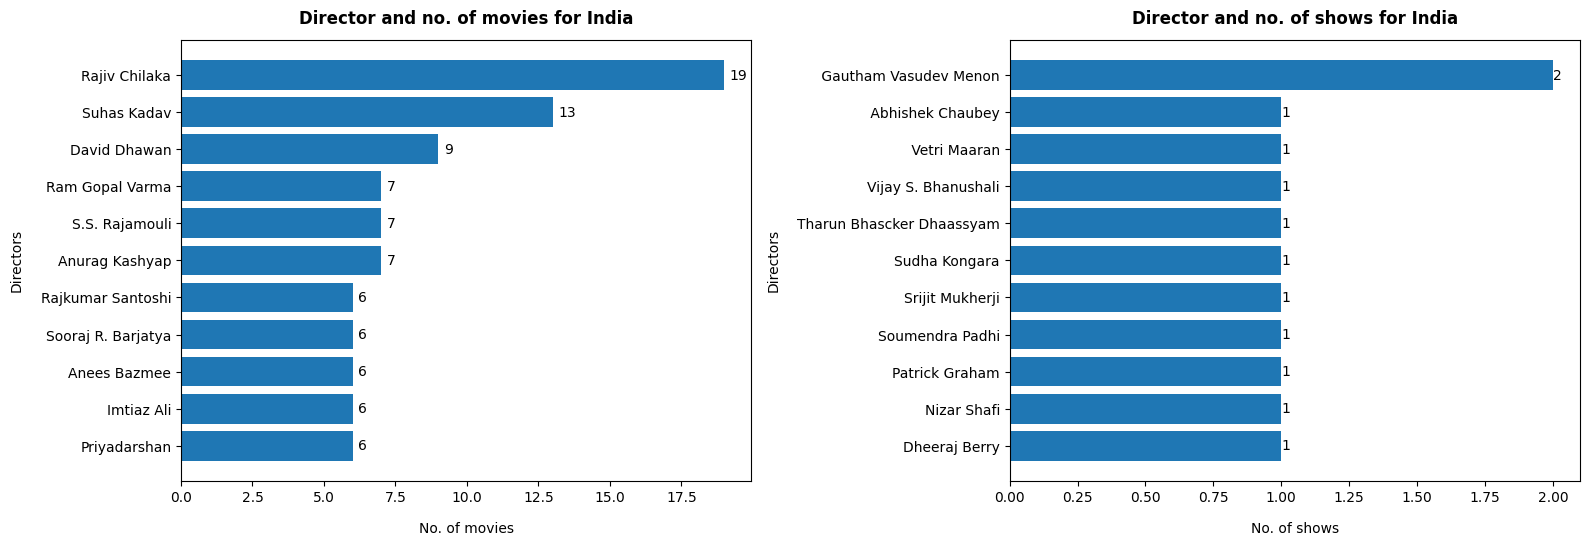

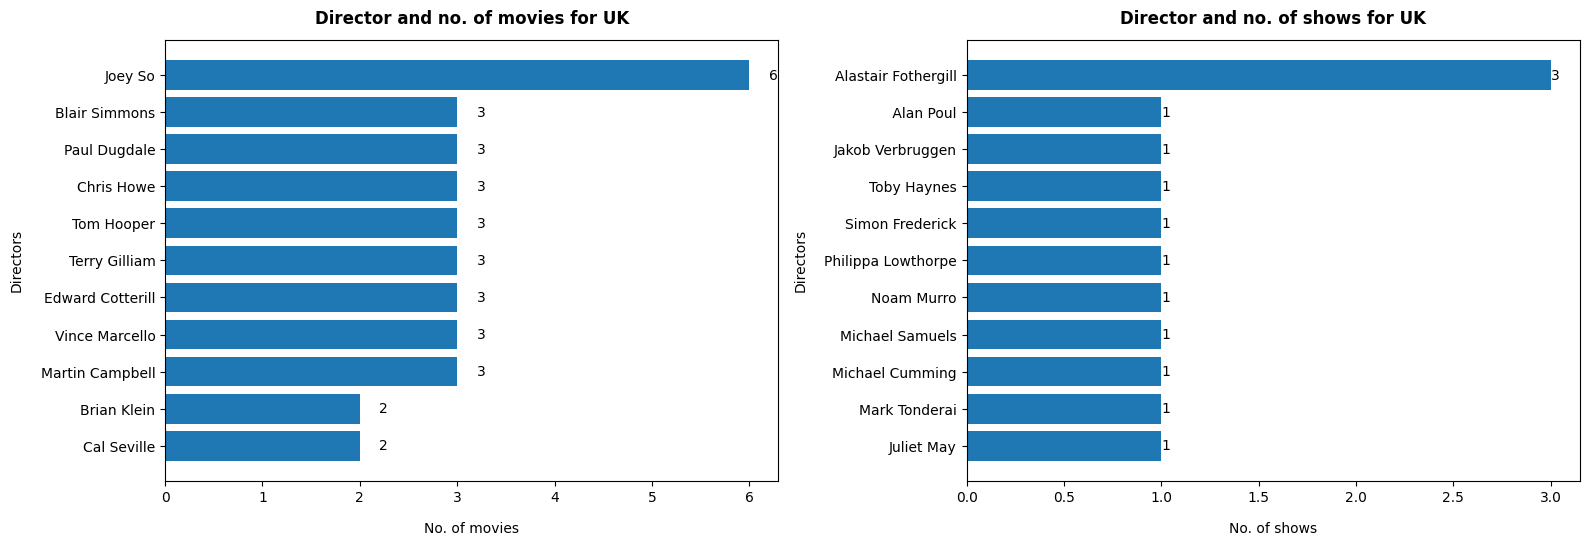

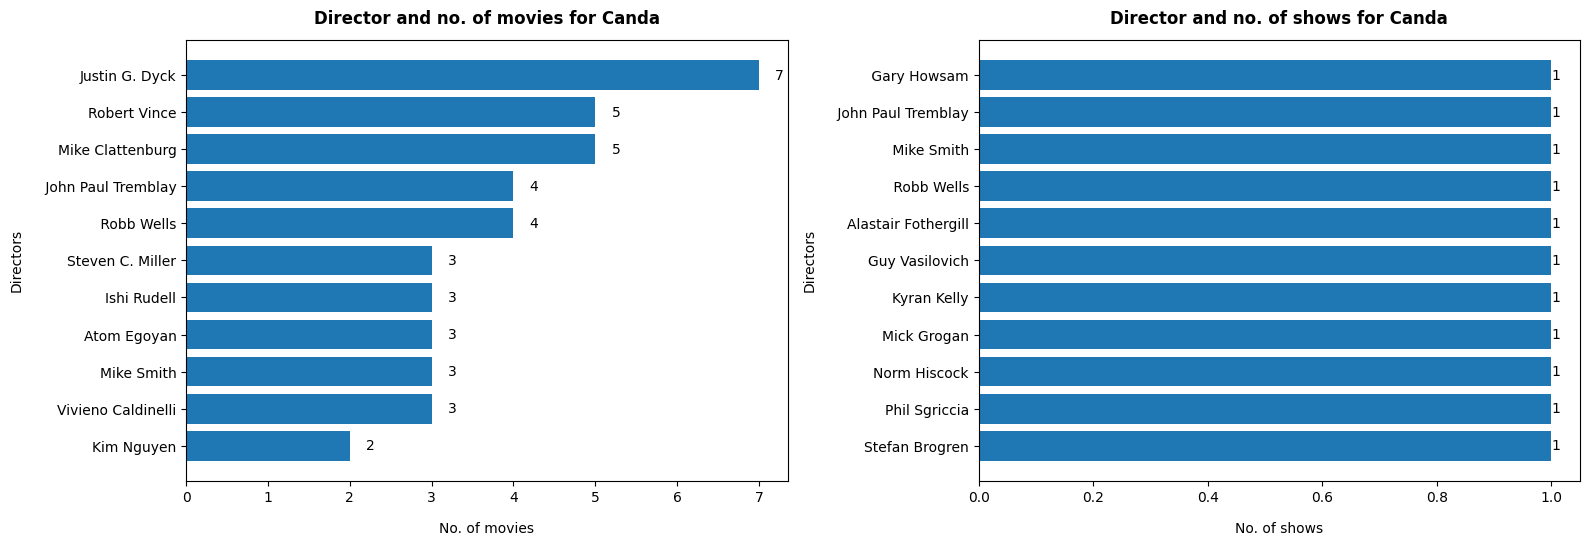

In [ ]:
plt.figure(figsize = (16,20))
plt.subplot(4,2,1)
plt.barh(movies_director_US['director'][::-1], movies_director_US['title'][::-1])
for i, value in enumerate(movies_director_US['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Director and no. of movies for US', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Directors', labelpad = 12)

plt.subplot(4,2,2)
plt.barh(shows_director_US['director'][::-1], shows_director_US['title'][::-1])
for i, value in enumerate(shows_director_US['title'].values[::-1]):
  plt.text(value, i, str(value), ha = 'left', va = 'center')

plt.title('Director and no. of shows for US', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Directors', labelpad = 12)

plt.tight_layout()
plt.show()

plt.figure(figsize = (16,20))
plt.subplot(4,2,3)
plt.barh(movies_director_IND['director'][::-1], movies_director_IND['title'][::-1])
for i, value in enumerate(movies_director_IND['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Director and no. of movies for India', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Directors', labelpad = 12)

plt.subplot(4,2,4)
plt.barh(shows_director_IND['director'][::-1], shows_director_IND['title'][::-1])
for i, value in enumerate(shows_director_IND['title'].values[::-1]):
  plt.text(value, i, str(value), ha = 'left', va = 'center')

plt.title('Director and no. of shows for India', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Directors', labelpad = 12)

plt.tight_layout()
plt.show()

plt.figure(figsize = (16,20))
plt.subplot(4,2,5)
plt.barh(movies_director_UK['director'][::-1], movies_director_UK['title'][::-1])
for i, value in enumerate(movies_director_UK['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Director and no. of movies for UK', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Directors', labelpad = 12)

plt.subplot(4,2,6)
plt.barh(shows_director_UK['director'][::-1], shows_director_UK['title'][::-1])
for i, value in enumerate(shows_director_UK['title'].values[::-1]):
  plt.text(value, i, str(value), ha = 'left', va = 'center')

plt.title('Director and no. of shows for UK', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Directors', labelpad = 12)

plt.tight_layout()
plt.show()


plt.figure(figsize = (16,20))
plt.subplot(4,2,5)
plt.barh(movies_director_Can['director'][::-1], movies_director_Can['title'][::-1])
for i, value in enumerate(movies_director_Can['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Director and no. of movies for Canda', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Directors', labelpad = 12)

plt.subplot(4,2,6)
plt.barh(shows_director_Can['director'][::-1], shows_director_Can['title'][::-1])
for i, value in enumerate(shows_director_Can['title'].values[::-1]):
  plt.text(value, i, str(value), ha = 'left', va = 'center')

plt.title('Director and no. of shows for Canda', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Directors', labelpad = 12)

plt.tight_layout()
plt.show()



## **For movies based on no. movies**
#### for US the most popular directors (considering that this data corresponds to most watched content) are Markas Raboy, Jay Karas, Martin Scorsese, Jay Chapman, and steven spielberg.

#### for India, the most popular directors are Rajiv Chilaka, Suhas Kadav, David Dhavan, Ram Gopal Verma, and S.S. rajamauli.
#### for UK, the most popular directors are Joey So,Blair Simmons, Paul DUgdale,Chris Howe, and Tom Hopper
#### And for Canada, most popular directors are Justin D. Dyck, Robert Vince, Mike Clattenberg, Jogn Paul Tremblay, and Robb Wells  

## **For TV shows: based on no. TV Shows**

#### Not enough no. of TV shows are there to make a significant insight but based on available data,

#### for US, most popular directors are Stan Lathan and Rob Seidenglenz
#### For India, most popular director is Gautam vasudev menon
#### For UK,Alastier Forthegill
#### and for Canada, not enough data are there to make any significant insight.

In [ ]:
movies_actor_US = df_movies_US.groupby('cast').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:11]
movies_actor_US = movies_actor_US[movies_actor_US['cast'] != 'Unknown actor']

shows_actor_US = df_shows_US.groupby('cast').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:11]
shows_actor_US = shows_actor_US[shows_actor_US['cast'] != 'Unknown actor']

movies_actor_IND = df_movies_IND.groupby('cast').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:11]
movies_actor_IND = movies_actor_IND[movies_actor_IND['cast'] != 'Unknown actor']

shows_actor_IND = df_shows_IND.groupby('cast').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:11]
shows_actor_IND = shows_actor_IND[shows_actor_IND['cast'] != 'Unknown actor']

movies_actor_UK = df_movies_UK.groupby('cast').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:11]
movies_actor_UK = movies_actor_UK[movies_actor_UK['cast'] != 'Unknown actor']

shows_actor_UK = df_shows_UK.groupby('cast').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:11]
shows_actor_UK = shows_actor_UK[shows_actor_UK['cast'] != 'Unknown actor']

movies_actor_Can = df_movies_Can.groupby('cast').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:11]
movies_actor_Can = movies_actor_Can[movies_actor_Can['cast'] != 'Unknown actor']

shows_actor_Can = df_shows_Can.groupby('cast').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:11]
shows_actor_Can = shows_actor_Can[shows_actor_Can['cast'] != 'Unknown actor']

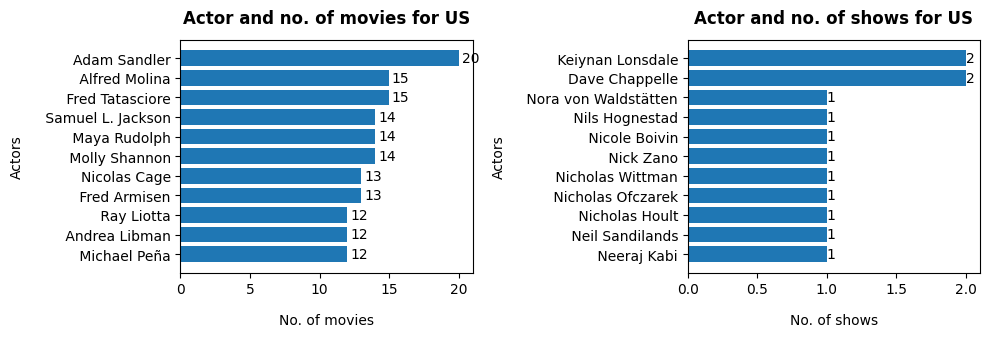

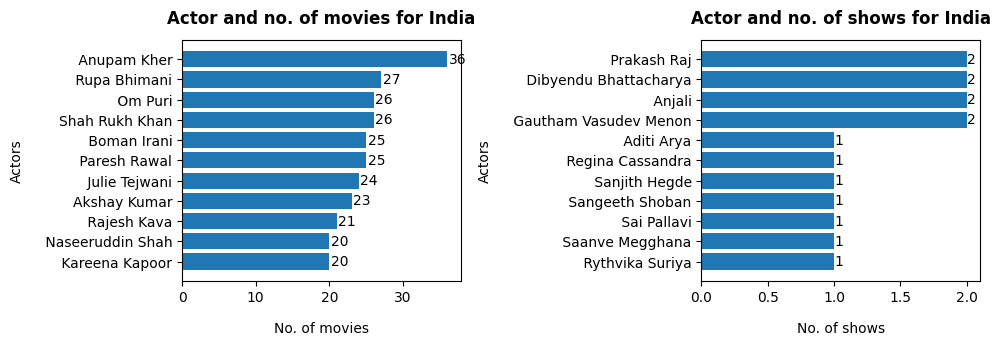

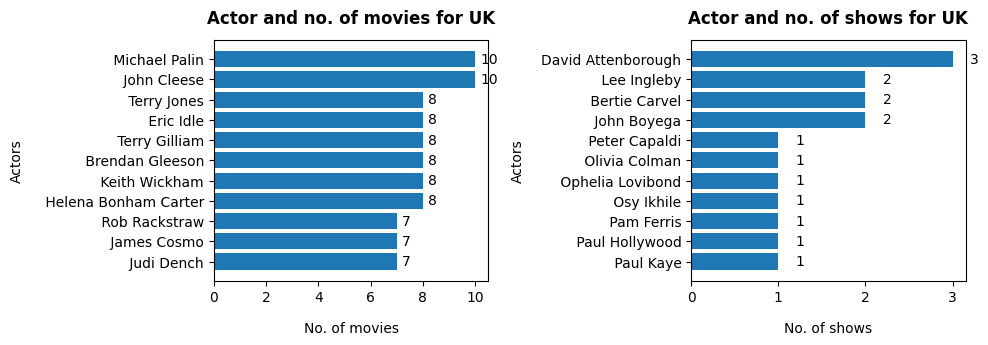

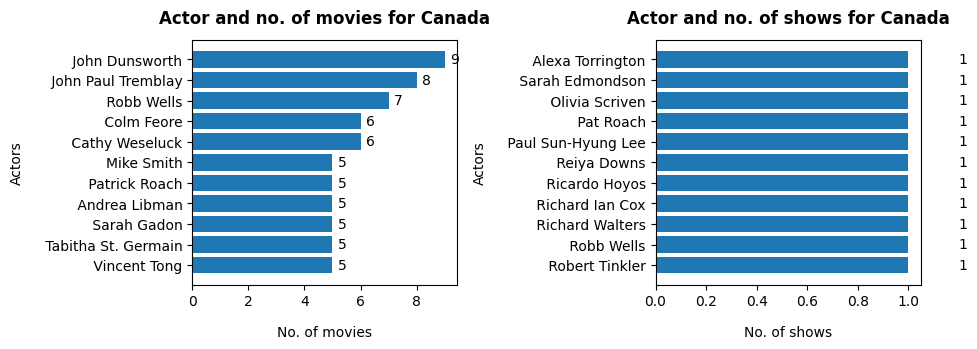

In [ ]:
plt.figure(figsize = (10, 12))

plt.subplot(4,2,1)
plt.barh(movies_actor_US['cast'][::-1], movies_actor_US['title'][::-1])
for i, value in enumerate(movies_actor_US['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Actor and no. of movies for US', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Actors', labelpad = 12)

plt.subplot(4,2,2)
plt.barh(shows_actor_US['cast'][::-1], shows_actor_US['title'][::-1])
for i, value in enumerate(shows_actor_US['title'].values[::-1]):
  plt.text(value, i, str(value), ha = 'left', va = 'center')

plt.title('Actor and no. of shows for US', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Actors', labelpad = 12)

plt.tight_layout()
plt.show()


plt.figure(figsize = (10, 12))
plt.subplot(4,2,3)
plt.barh(movies_actor_IND['cast'][::-1], movies_actor_IND['title'][::-1])
for i, value in enumerate(movies_actor_IND['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Actor and no. of movies for India', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Actors', labelpad = 12)

plt.subplot(4,2,4)
plt.barh(shows_actor_IND['cast'][::-1], shows_actor_IND['title'][::-1])
for i, value in enumerate(shows_actor_IND['title'].values[::-1]):
  plt.text(value, i, str(value), ha = 'left', va = 'center')

plt.title('Actor and no. of shows for India', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Actors', labelpad = 12)

plt.tight_layout()
plt.show()


plt.figure(figsize = (10, 12))
plt.subplot(4,2,5)
plt.barh(movies_actor_UK['cast'][::-1], movies_actor_UK['title'][::-1])
for i, value in enumerate(movies_actor_UK['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Actor and no. of movies for UK', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Actors', labelpad = 12)

plt.subplot(4,2,6)
plt.barh(shows_actor_UK['cast'][::-1], shows_actor_UK['title'][::-1])
for i, value in enumerate(shows_actor_UK['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Actor and no. of shows for UK', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Actors', labelpad = 12)

plt.tight_layout()
plt.show()


plt.figure(figsize = (10, 12))
plt.subplot(4,2,7)
plt.barh(movies_actor_Can['cast'][::-1], movies_actor_Can['title'][::-1])
for i, value in enumerate(movies_actor_Can['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Actor and no. of movies for Canada', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Actors', labelpad = 12)

plt.subplot(4,2,8)
plt.barh(shows_actor_Can['cast'][::-1], shows_actor_Can['title'][::-1])
for i, value in enumerate(shows_actor_Can['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Actor and no. of shows for Canada', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Actors', labelpad = 12)

plt.tight_layout()
plt.show()

#### the graphs in the abbove section presents the top actors according to the no. of contnet on netflix separately for movies and TV shows for US, India, Uk, and Canada.

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'new_date_added', 'Week_Added', 'Month_added', 'Year_added',
       'actor_director'],
      dtype='object')

In [ ]:
movies_relse_yr_US = df_movies_US.groupby('release_year').agg({'title': 'nunique'}).reset_index().sort_values(by = 'release_year')
shows_relse_yr_US = df_shows_US.groupby('release_year').agg({'title': 'nunique'}).reset_index().sort_values(by = 'release_year')


movies_relse_yr_IND = df_movies_IND.groupby('release_year').agg({'title': 'nunique'}).reset_index().sort_values(by = 'release_year')
shows_relse_yr_IND = df_shows_IND.groupby('release_year').agg({'title': 'nunique'}).reset_index().sort_values(by = 'release_year')


movies_relse_yr_UK = df_movies_UK.groupby('release_year').agg({'title': 'nunique'}).reset_index().sort_values(by = 'release_year')
shows_relse_yr_UK = df_shows_UK.groupby('release_year').agg({'title': 'nunique'}).reset_index().sort_values(by = 'release_year')


movies_relse_yr_Can = df_movies_Can.groupby('release_year').agg({'title': 'nunique'}).reset_index().sort_values(by = 'release_year')
shows_relse_yr_Can = df_shows_Can.groupby('release_year').agg({'title': 'nunique'}).reset_index().sort_values(by = 'release_year')


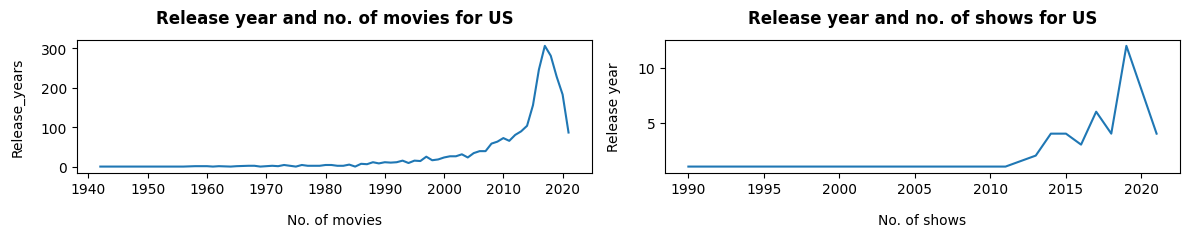

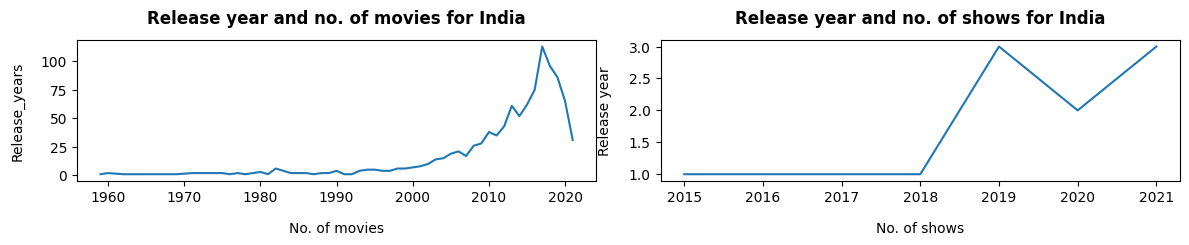

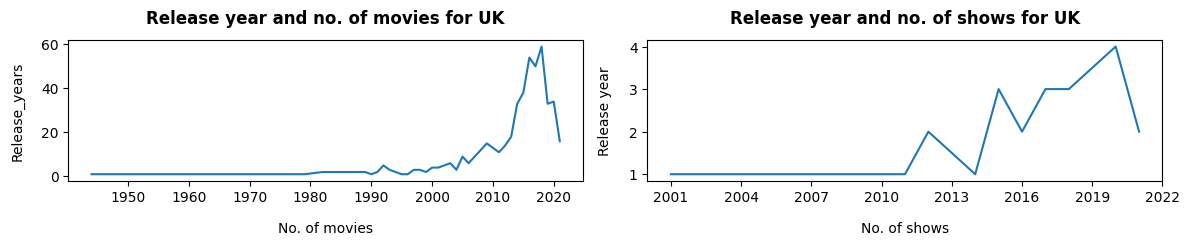

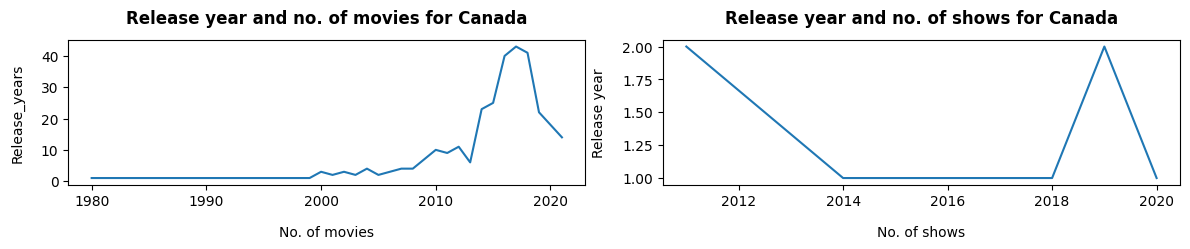

In [ ]:
plt.figure(figsize = (12, 8))
plt.subplot(4,2,1)
plt.plot(movies_relse_yr_US['release_year'][::-1], movies_relse_yr_US['title'][::-1])
plt.title('Release year and no. of movies for US', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Release_years', labelpad = 12)

plt.subplot(4,2,2)
plt.plot(shows_relse_yr_US['release_year'][::-1], shows_relse_yr_US['title'][::-1])
plt.title('Release year and no. of shows for US', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Release year', labelpad = 12)

plt.tight_layout()
plt.show()


plt.figure(figsize = (12, 8))
plt.subplot(4,2,3)
plt.plot(movies_relse_yr_IND['release_year'][::-1], movies_relse_yr_IND['title'][::-1])
plt.title('Release year and no. of movies for India', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Release_years', labelpad = 12)

plt.subplot(4,2,4)
plt.plot(shows_relse_yr_IND['release_year'][::-1], shows_relse_yr_IND['title'][::-1])
plt.title('Release year and no. of shows for India', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Release year', labelpad = 12)

plt.tight_layout()
plt.show()


plt.figure(figsize = (12, 8))
plt.subplot(4,2,5)
plt.plot(movies_relse_yr_UK['release_year'][::-1], movies_relse_yr_UK['title'][::-1])
plt.title('Release year and no. of movies for UK', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Release_years', labelpad = 12)

plt.subplot(4,2,6)
plt.plot(shows_relse_yr_UK['release_year'][::-1], shows_relse_yr_UK['title'][::-1])
plt.xticks(range(int(min(shows_relse_yr_UK['release_year'])), int(max(shows_relse_yr_UK['release_year']))+2, 3))

plt.title('Release year and no. of shows for UK', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Release year', labelpad = 12)

plt.tight_layout()
plt.show()



plt.figure(figsize = (12, 8))
plt.subplot(4,2,7)
plt.plot(movies_relse_yr_Can['release_year'][::-1], movies_relse_yr_Can['title'][::-1])
plt.title('Release year and no. of movies for Canada', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Release_years', labelpad = 12)

plt.subplot(4,2,8)
plt.plot(shows_relse_yr_Can['release_year'][::-1], shows_relse_yr_Can['title'][::-1])
plt.title('Release year and no. of shows for Canada', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Release year', labelpad = 12)

plt.tight_layout()
plt.show()

#### Movies released prior to 2000 is very minimal on netflix for all the countries, However, from the graph it is clear that old movies from US and India have relatively higher than UK and clearly more in when compared to Canada.

#### No. of TV shows is better spread out in US and UK. India had nearly zero TV shows on release before 2018. However, a signficant no, of TV shows released in 2019 are there on Netflix and this is true across countries.

In [ ]:
movies_rating_US = df_movies_US.groupby('rating').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)
shows_rating_US = df_shows_US.groupby('rating').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)

movies_rating_IND = df_movies_IND.groupby('rating').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)
shows_rating_IND = df_shows_IND.groupby('rating').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)

movies_rating_UK = df_movies_UK.groupby('rating').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)
shows_rating_UK = df_shows_UK.groupby('rating').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)

movies_rating_Can = df_movies_Can.groupby('rating').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)
shows_rating_Can = df_shows_Can.groupby('rating').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)

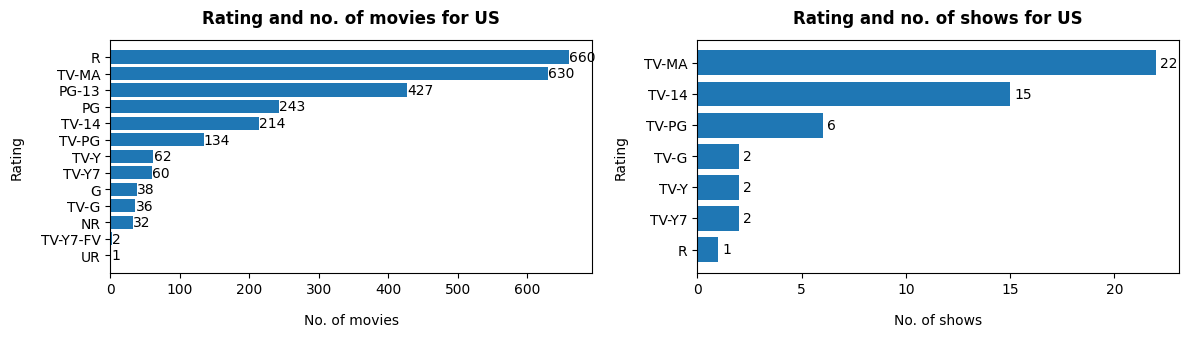

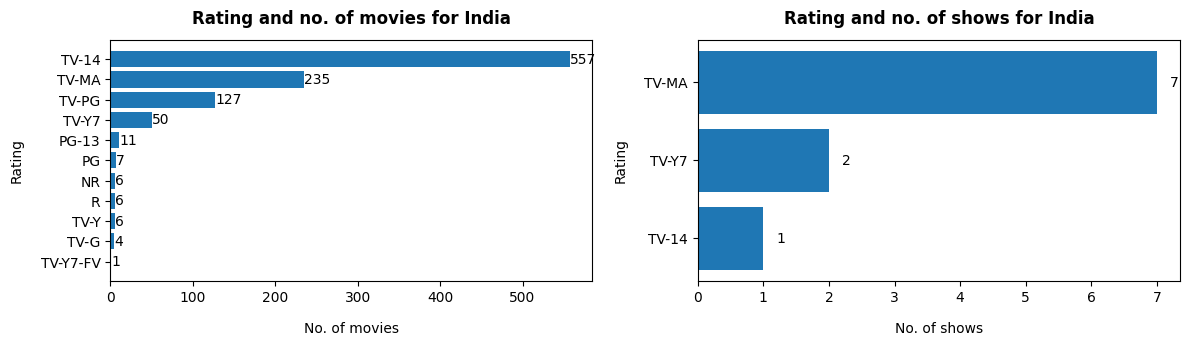

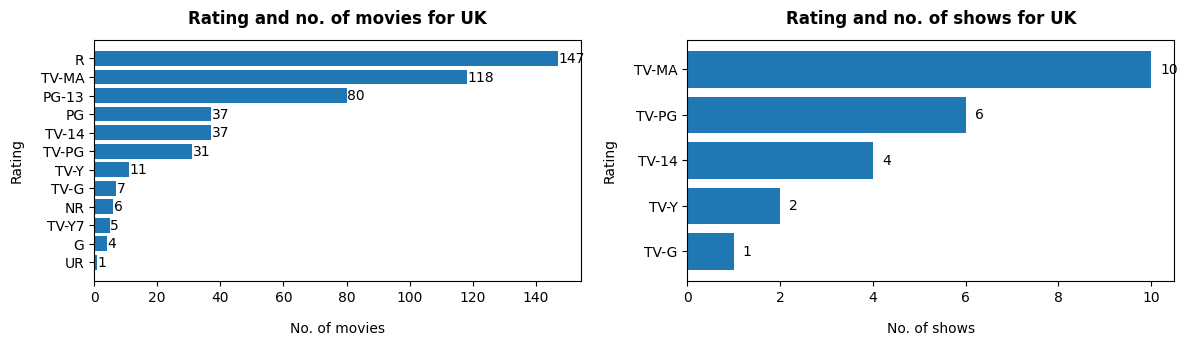

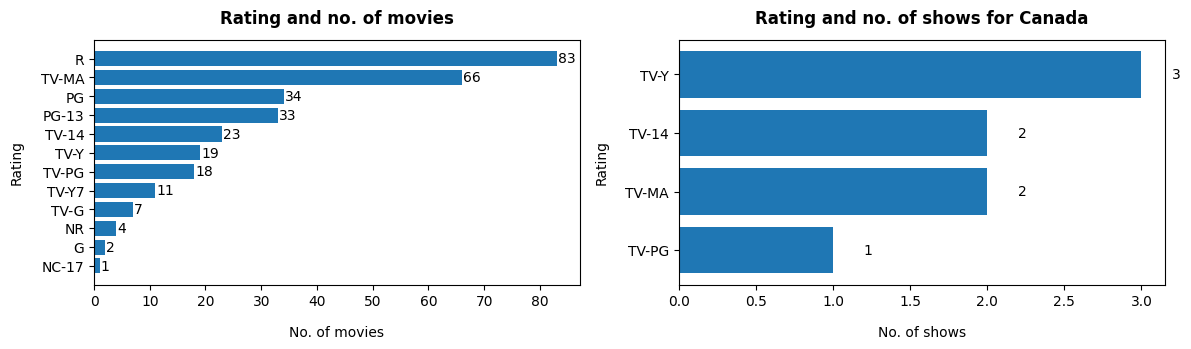

In [ ]:
## US Movies
plt.figure(figsize = (12, 12))
plt.subplot(4,2,1)
plt.barh(movies_rating_US['rating'][::-1], movies_rating_US['title'][::-1])
for i, value in enumerate(movies_rating_US['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Rating and no. of movies for US', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Rating', labelpad = 12)

## US TV Shows
plt.subplot(4,2,2)
plt.barh(shows_rating_US['rating'][::-1], shows_rating_US['title'][::-1])
for i, value in enumerate(shows_rating_US['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Rating and no. of shows for US', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Rating', labelpad = 12)

plt.tight_layout()
plt.show()

## India Movies

plt.figure(figsize = (12, 12))
plt.subplot(4,2,3)
plt.barh(movies_rating_IND['rating'][::-1], movies_rating_IND['title'][::-1])
for i, value in enumerate(movies_rating_IND['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Rating and no. of movies for India', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Rating', labelpad = 12)

## for India TV shows
plt.subplot(4,2,4)
plt.barh(shows_rating_IND['rating'][::-1], shows_rating_IND['title'][::-1])
for i, value in enumerate(shows_rating_IND['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Rating and no. of shows for India', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Rating', labelpad = 12)

plt.tight_layout()
plt.show()

## for UK movies

plt.figure(figsize = (12, 12))
plt.subplot(4,2,5)
plt.barh(movies_rating_UK['rating'][::-1], movies_rating_UK['title'][::-1])
for i, value in enumerate(movies_rating_UK['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Rating and no. of movies for UK', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Rating', labelpad = 12)

plt.subplot(4,2,6)
plt.barh(shows_rating_UK['rating'][::-1], shows_rating_UK['title'][::-1])
for i, value in enumerate(shows_rating_UK['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Rating and no. of shows for UK', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Rating', labelpad = 12)

plt.tight_layout()
plt.show()


## for canada movies

plt.figure(figsize = (12, 12))
plt.subplot(4,2,7)
plt.barh(movies_rating_Can['rating'][::-1], movies_rating_Can['title'][::-1])
for i, value in enumerate(movies_rating_Can['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Rating and no. of movies', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Rating', labelpad = 12)

## for canada TV Shows
plt.subplot(4,2,8)
plt.barh(shows_rating_Can['rating'][::-1], shows_rating_Can['title'][::-1])
for i, value in enumerate(shows_rating_Can['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Rating and no. of shows for Canada', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Rating', labelpad = 12)

plt.tight_layout()
plt.show()

#### Movies with ratings R, TV- MA, PG, PG-13, and TV-14 are highest in US, UK, and Canada. Particularily, Movies with rating R and TV-MA the top two rating of movies in terms of no. of movies across countries. however for the alst three rated movies i.e. PG, PG-13, and TV-14 the sequence of popularity changes. But cumulatively these 5 rated movies are the most popular movies across US, UK, and Canada.

#### for India, the popularity of rating for movies changes. The most popular movie rating for India is TV -14, followed by TV-MA, TV-PG, and TV-Y7. The top rating for other three countries 'R' falls far below in case of India. The gap between first top rating is also strakingly high for India compared to other three countries

#### ***Therefor it is recommended to add focus on R and TV-MA rated movies while considering to add content for US, UK and Canada. For India the focus should be on movies with rating TV-14***.


#### for TV shows this pattern again changes. the top rating of TV in term of no. of TV shows for US and India and UK is TV-MA while for Canada it is TV-Y. The sunsequent top two rating for US are TV-14 and TV-PG, for UK is TV-PG and TV-14, for Canada is TV-14 and TV-MA and for India it is TV-Y7 and TV-14. Interestingly, India does not have any shows with rating TV-PG which are one of the popular rating in other three countries

#### ***Therefore, while considering to add more TV shows Netflix can adopt various approches***

1. ***If Netflix can add TV shows with rating TV-MA for all te countries.***
2. ***if Netflix want to add TV shows specific to countries then It should focus TV-MA rating shows for US, India, and UK. while for Camada It shold focus on adding more TV shows with Tv-Y rating.***

3.***Additionally, Netflix can experiment adding TV shows with TV-Y rating in India. Since, This TV shows with rating TV-Y is not available in India, it is unknown how would Indians react to such content. So, There is a scope of experimentation***

In [ ]:
movies_duration_US = df_movies_US.groupby('duration').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)
shows_duration_US = df_shows_US.groupby('duration').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)


movies_duration_IND = df_movies_IND.groupby('duration').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)
shows_duration_IND = df_shows_IND.groupby('duration').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)


movies_duration_UK = df_movies_UK.groupby('duration').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)
shows_duration_UK = df_shows_UK.groupby('duration').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)


movies_duration_Can = df_movies_Can.groupby('duration').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)
shows_duration_Can = df_shows_Can.groupby('duration').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)


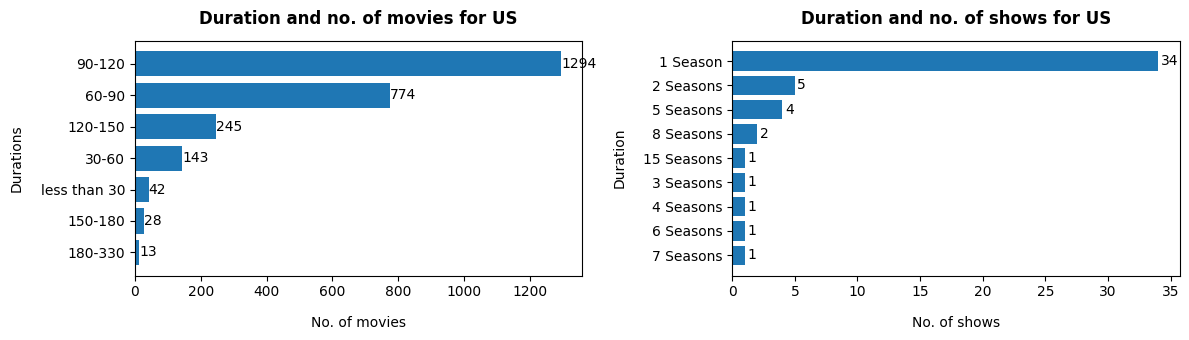

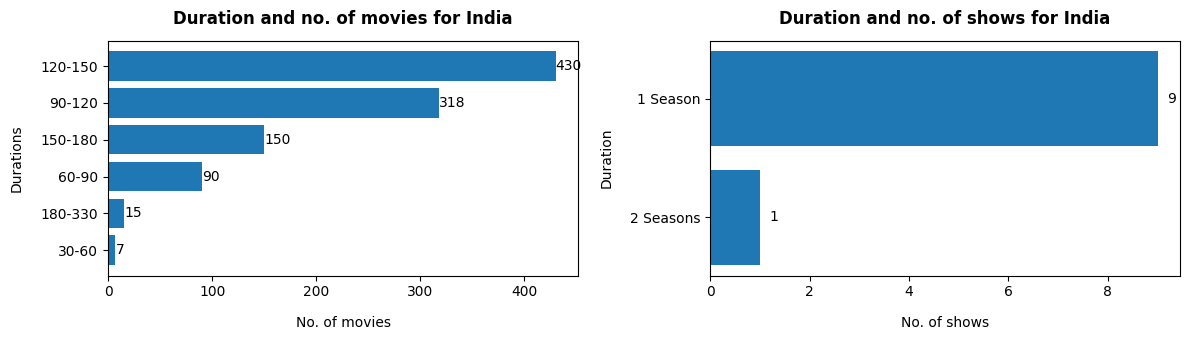

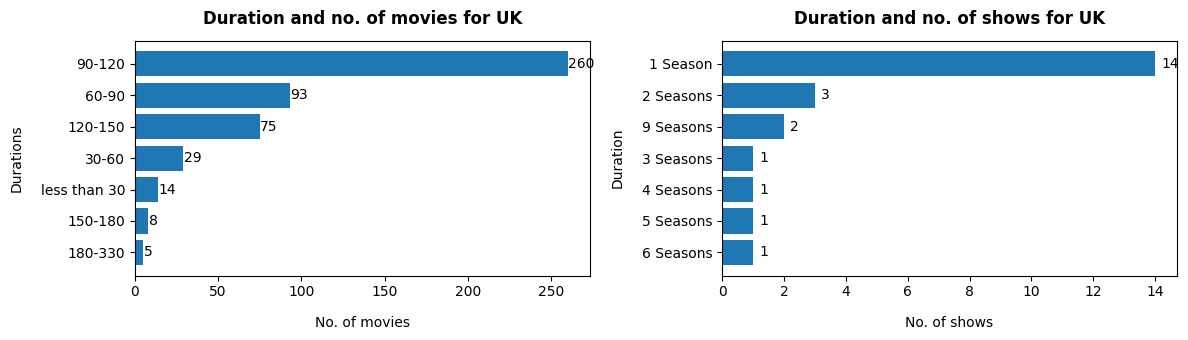

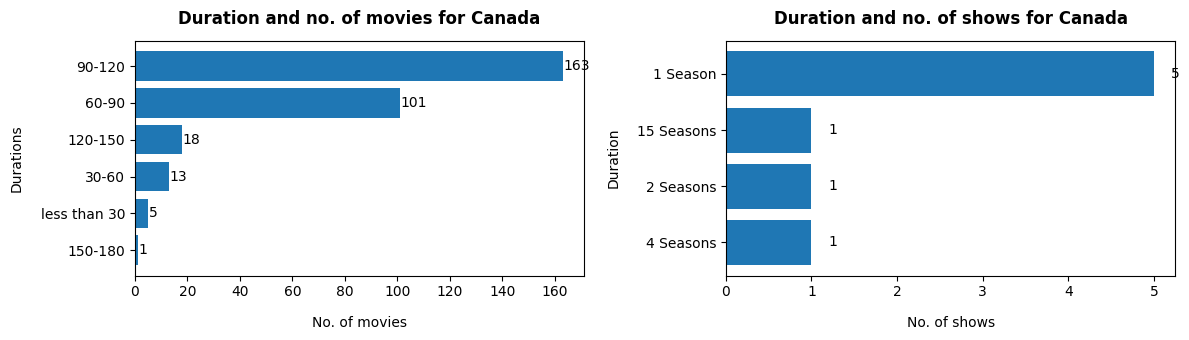

In [ ]:
## for US
plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
plt.barh(movies_duration_US['duration'][::-1], movies_duration_US['title'][::-1])
for i, value in enumerate(movies_duration_US['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Duration and no. of movies for US', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Durations', labelpad = 12)

plt.subplot(1,2,2)
plt.barh(shows_duration_US['duration'][::-1], shows_duration_US['title'][::-1])
for i, value in enumerate(shows_duration_US['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Duration and no. of shows for US', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Duration', labelpad = 12)

plt.tight_layout()
plt.show()


# For INDIA

plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
plt.barh(movies_duration_IND['duration'][::-1], movies_duration_IND['title'][::-1])
for i, value in enumerate(movies_duration_IND['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Duration and no. of movies for India', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Durations', labelpad = 12)

plt.subplot(1,2,2)
plt.barh(shows_duration_IND['duration'][::-1], shows_duration_IND['title'][::-1])
for i, value in enumerate(shows_duration_IND['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Duration and no. of shows for India', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Duration', labelpad = 12)

plt.tight_layout()
plt.show()

# for UK
plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
plt.barh(movies_duration_UK['duration'][::-1], movies_duration_UK['title'][::-1])
for i, value in enumerate(movies_duration_UK['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Duration and no. of movies for UK', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Durations', labelpad = 12)

plt.subplot(1,2,2)
plt.barh(shows_duration_UK['duration'][::-1], shows_duration_UK['title'][::-1])
for i, value in enumerate(shows_duration_UK['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Duration and no. of shows for UK', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Duration', labelpad = 12)

plt.tight_layout()
plt.show()


# for Canada
plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
plt.barh(movies_duration_Can['duration'][::-1], movies_duration_Can['title'][::-1])
for i, value in enumerate(movies_duration_Can['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Duration and no. of movies for Canada', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Durations', labelpad = 12)

plt.subplot(1,2,2)
plt.barh(shows_duration_Can['duration'][::-1], shows_duration_Can['title'][::-1])
for i, value in enumerate(shows_duration_Can['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Duration and no. of shows for Canada', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Duration', labelpad = 12)

plt.tight_layout()
plt.show()

#### The popularity of contents based on timelength of the conten also varies for teh countries under analysis.

#### for US, Uk, and Canada, the most popular movies are of the length 90-120 minutes. the second most popular length is 60-90 minutes across these three countries. while in India, the most popular length for movies is 120-150 minutes followed by 90-120 minutes. The third popular length for India is 150-180. Also there is no content which is less than 30 minutes in India while for other three countries it is there and is in cosiderable numbers in US and Uk.

#### ***Therefore, while adding contents on the platform, OTTs are recommended to add more contne of length 90-120 minutes for US, Uk, and Canadians while for India longer format movies are recommended. However, for global audiance, the movies with length 90-120 minutes should be preffered.***


#### The pattern of time length for countries changes starkingly for TV shows. while in India the longer movie formats were preffered, Longer TV shows are not present in strong numbers on Netflix. The situation is reveresed for US, Uk, and canada. While medium length movies are preffered in these countries, There are considerable number of TV shows with longer seasons across the three countries. In Indis, the maxximum no. of season for TV shows were 2 seasons while for US, UK and Canada, the maximum no, of season for Tv shows were 15, 9, and 15 respectively. However, TV shows of one season only were highest across countries.

#### ***Therefore, It is recommended that for India shorter format of TV shows should be preffered to produce or to be added for OTT audiance while for US, UK, and canada, longer format would also work.***

#### ***for global audiance, TV shows of one or two season should be focussed***

In [ ]:
movies_Zenre_US = df_movies_US.groupby('listed_in').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)
shows_Zenre_US = df_shows_US.groupby('listed_in').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)

movies_Zenre_IND = df_movies_IND.groupby('listed_in').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)
shows_Zenre_IND = df_shows_IND.groupby('listed_in').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)

movies_Zenre_UK = df_movies_UK.groupby('listed_in').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)
shows_Zenre_UK = df_shows_UK.groupby('listed_in').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)

movies_Zenre_Can = df_movies_Can.groupby('listed_in').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)
shows_Zenre_Can = df_shows_Can.groupby('listed_in').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)

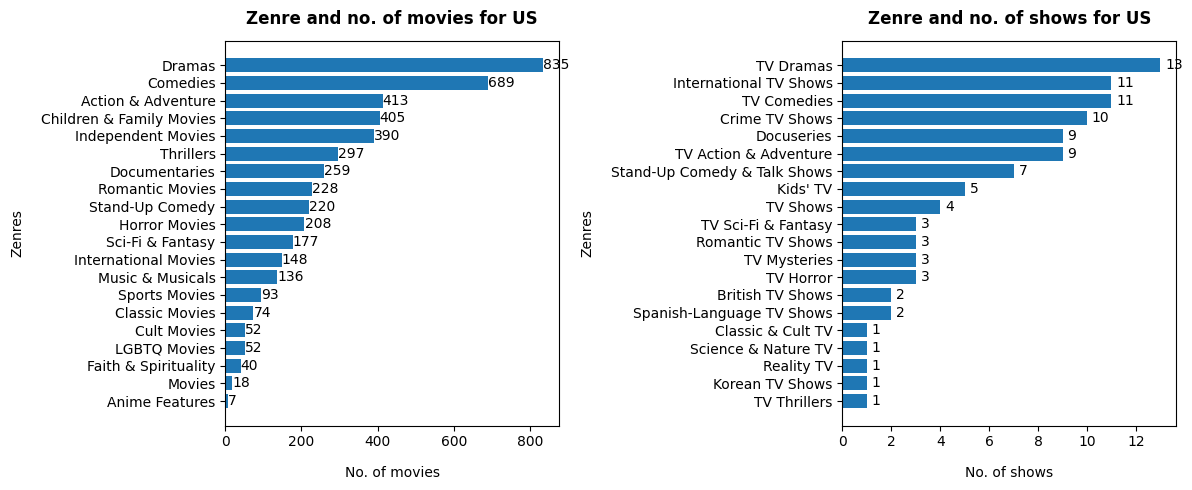

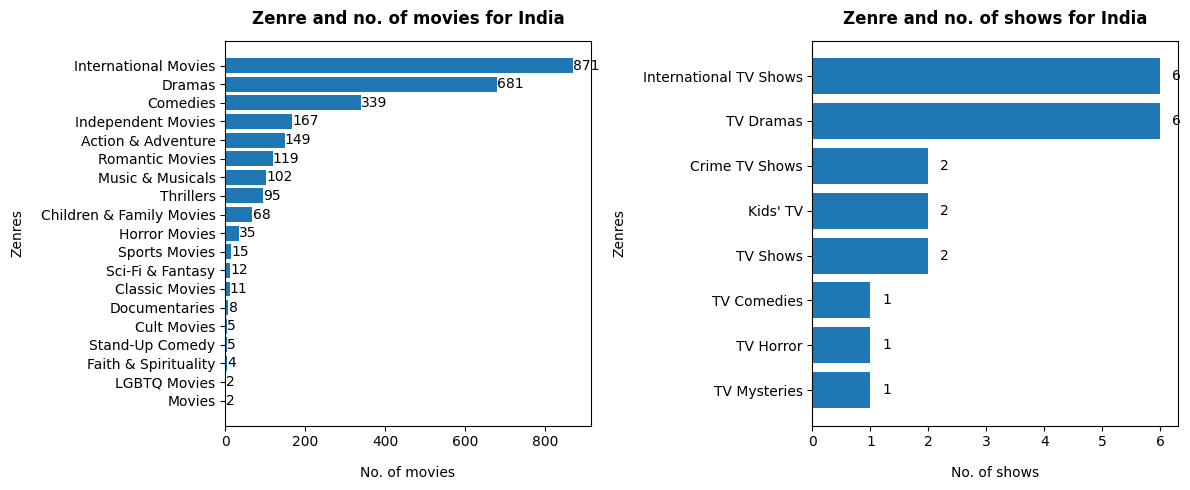

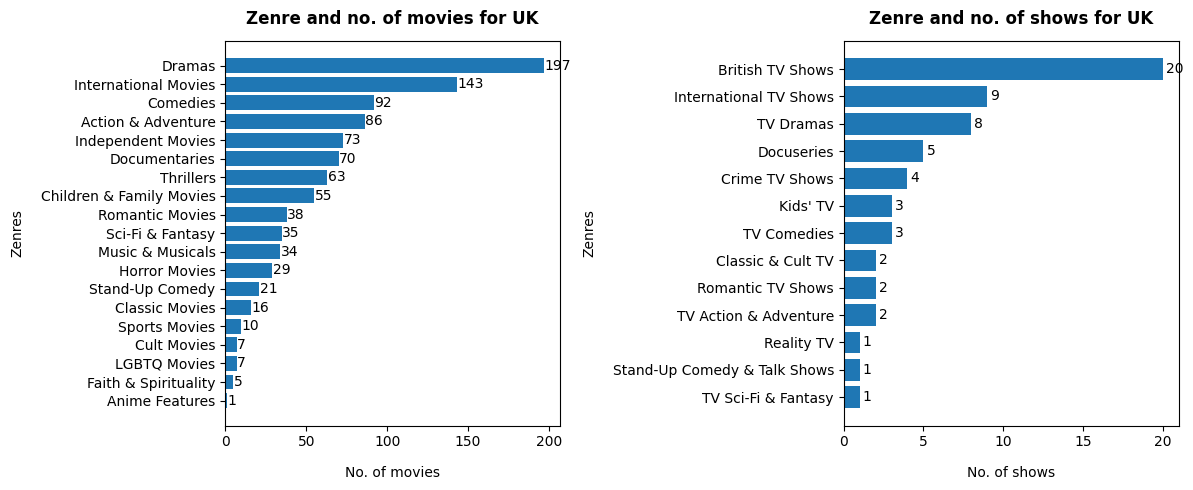

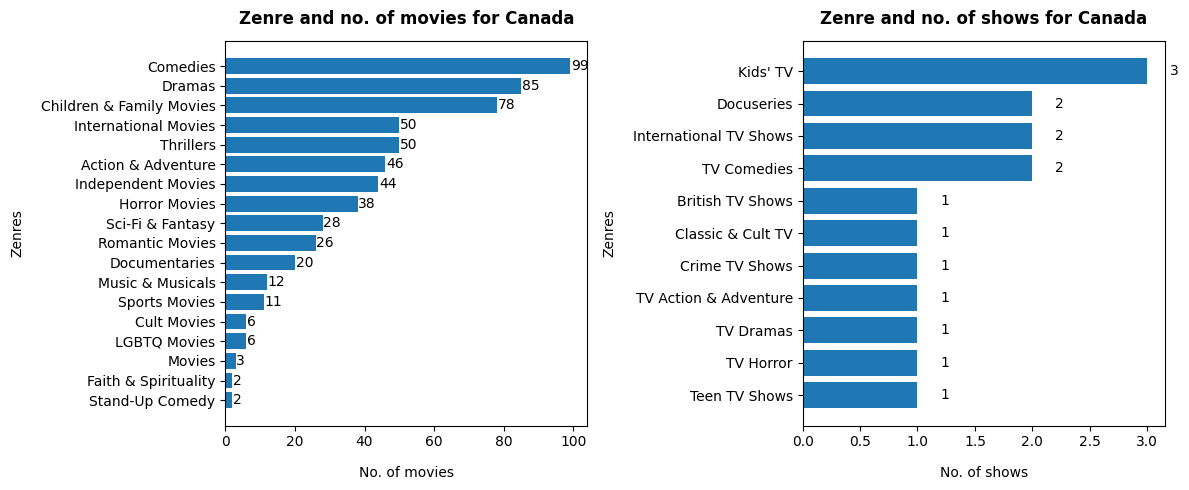

In [ ]:
## for US
plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.barh(movies_Zenre_US['listed_in'][::-1], movies_Zenre_US['title'][::-1])
for i, value in enumerate(movies_Zenre_US['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Zenre and no. of movies for US', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Zenres', labelpad = 12)

plt.subplot(1,2,2)
plt.barh(shows_Zenre_US['listed_in'][::-1], shows_Zenre_US['title'][::-1])
for i, value in enumerate(shows_Zenre_US['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Zenre and no. of shows for US', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Zenres', labelpad = 12)

plt.tight_layout()
plt.show()

## for India
plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.barh(movies_Zenre_IND['listed_in'][::-1], movies_Zenre_IND['title'][::-1])
for i, value in enumerate(movies_Zenre_IND['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Zenre and no. of movies for India', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Zenres', labelpad = 12)

plt.subplot(1,2,2)
plt.barh(shows_Zenre_IND['listed_in'][::-1], shows_Zenre_IND['title'][::-1])
for i, value in enumerate(shows_Zenre_IND['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Zenre and no. of shows for India', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Zenres', labelpad = 12)

plt.tight_layout()
plt.show()

## for UK
plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.barh(movies_Zenre_UK['listed_in'][::-1], movies_Zenre_UK['title'][::-1])
for i, value in enumerate(movies_Zenre_UK['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Zenre and no. of movies for UK', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Zenres', labelpad = 12)

plt.subplot(1,2,2)
plt.barh(shows_Zenre_UK['listed_in'][::-1], shows_Zenre_UK['title'][::-1])
for i, value in enumerate(shows_Zenre_UK['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Zenre and no. of shows for UK', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Zenres', labelpad = 12)

plt.tight_layout()
plt.show()

## for Canada
plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.barh(movies_Zenre_Can['listed_in'][::-1], movies_Zenre_Can['title'][::-1])
for i, value in enumerate(movies_Zenre_Can['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Zenre and no. of movies for Canada', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Zenres', labelpad = 12)

plt.subplot(1,2,2)
plt.barh(shows_Zenre_Can['listed_in'][::-1], shows_Zenre_Can['title'][::-1])
for i, value in enumerate(shows_Zenre_Can['title'].values[::-1]):
  plt.text(value + 0.2, i, str(value), ha = 'left', va = 'center')

plt.title('Zenre and no. of shows for Canada', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Zenres', labelpad = 12)

plt.tight_layout()
plt.show()

#### for movies, the top zenres in US are Drama and comedy. Action and Adeventure, Children and Family movies, and indeoendent movies are also present in large numbers. Top Zenre in India is International Movies. Drama and Comedies movies are also present in considerable numbers. In UK, Drama and International movies are the most popular Zenres while Comdies, action and adventure, Independent movies, documetries are also in significant numbers. for Canada, comdies were the top most Zenre while Drama and chidren and family movies were also quite high in numbers. Also, there are good no. of documentries in US, UK, and Canada while it is nearly negligible in India.

#### for TV Shows, In US, TV Drama, International TV shows, Tv Comedies, Crime TV shows, docuseries, Action and adventure have a good presence. In India, International TV shows and TV dramas dominates the number. In the Uk, the most dominating Zenre is British Tv shows. However, International Tv shows, Dramas are also in good number alongside few docuseries. In Canada, the most popular Zenre is Kids' TV followed by docuseries, international TV shows, and Tv comadeies.


In [ ]:
movies_yr_added_US = df_movies_US.groupby('Year_added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Year_added')
shows_yr_added_US = df_shows_US.groupby('Year_added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Year_added')

movies_yr_added_IND = df_movies_IND.groupby('Year_added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Year_added')
shows_yr_added_IND = df_shows_IND.groupby('Year_added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Year_added')

movies_yr_added_UK = df_movies_UK.groupby('Year_added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Year_added')
shows_yr_added_UK = df_shows_UK.groupby('Year_added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Year_added')

movies_yr_added_Can = df_movies_Can.groupby('Year_added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Year_added')
shows_yr_added_Can = df_shows_Can.groupby('Year_added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Year_added')


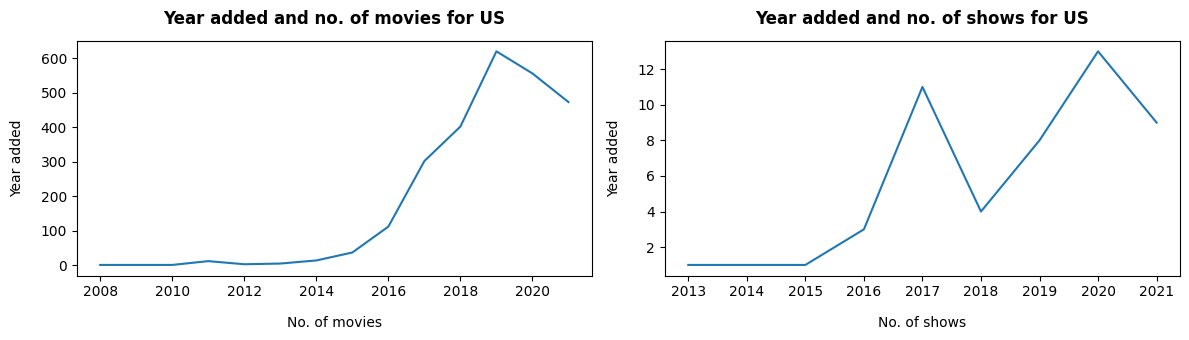

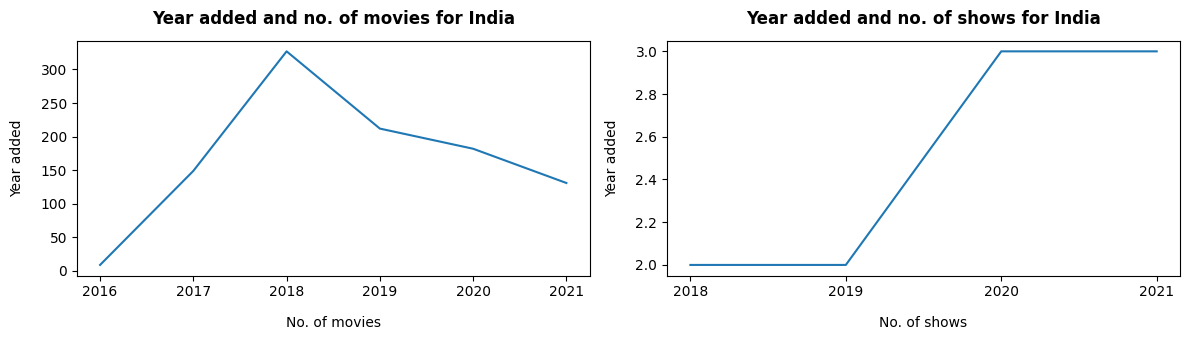

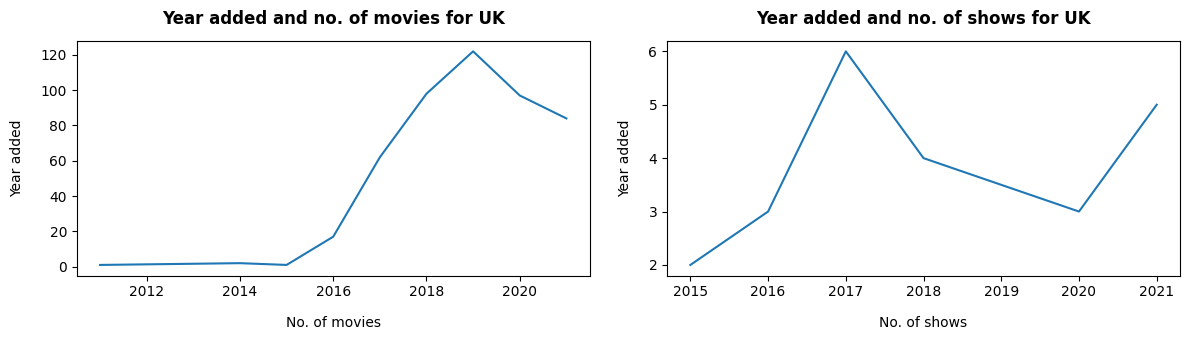

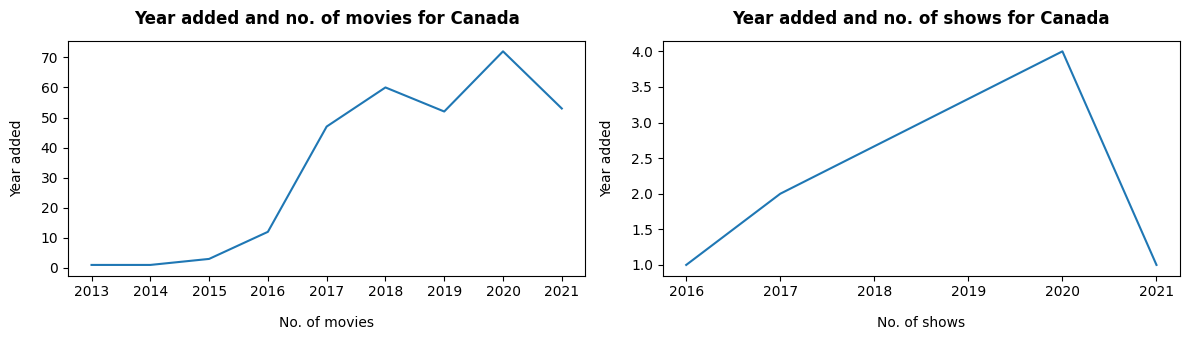

In [ ]:
## for US
plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
plt.plot(movies_yr_added_US['Year_added'][::-1], movies_yr_added_US['title'][::-1])

plt.title('Year added and no. of movies for US', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Year added', labelpad = 12)

plt.subplot(1,2,2)
plt.plot(shows_yr_added_US['Year_added'][::-1], shows_yr_added_US['title'][::-1])

plt.title('Year added and no. of shows for US', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Year added', labelpad = 12)

plt.tight_layout()
plt.show()

## for India
plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
plt.plot(movies_yr_added_IND['Year_added'][::-1], movies_yr_added_IND['title'][::-1])

plt.title('Year added and no. of movies for India', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Year added', labelpad = 12)

plt.subplot(1,2,2)
plt.plot(shows_yr_added_IND['Year_added'][::-1], shows_yr_added_IND['title'][::-1])
plt.xticks(range(int(min(shows_yr_added_IND['Year_added'])), int(max(shows_yr_added_IND['Year_added'])) + 1))

plt.title('Year added and no. of shows for India', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Year added', labelpad = 12)

plt.tight_layout()
plt.show()

## for Uk
plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
plt.plot(movies_yr_added_UK['Year_added'][::-1], movies_yr_added_UK['title'][::-1])

plt.title('Year added and no. of movies for UK', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Year added', labelpad = 12)

plt.subplot(1,2,2)
plt.plot(shows_yr_added_UK['Year_added'][::-1], shows_yr_added_UK['title'][::-1])

plt.title('Year added and no. of shows for UK', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Year added', labelpad = 12)

plt.tight_layout()
plt.show()

## for Canada
plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
plt.plot(movies_yr_added_Can['Year_added'][::-1], movies_yr_added_Can['title'][::-1])

plt.title('Year added and no. of movies for Canada', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Year added', labelpad = 12)

plt.subplot(1,2,2)
plt.plot(shows_yr_added_Can['Year_added'][::-1], shows_yr_added_Can['title'][::-1])

plt.title('Year added and no. of shows for Canada', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Year added', labelpad = 12)

plt.tight_layout()
plt.show()

#### Highest no. of movies added on Netflix for US was in 2019. the same is true for UK. In India, the higest number of movies were added in 2018 while for Canada, the highest number of movies corresponds to 2020.

#### ***This does not reveal any business insights. However, it is crucial to check further enaggement of viewers on these content and if dropping then fresh contents shoud be added in morenumber specially for India.***

### The same is true for TV shows.

In [ ]:
movies_month_added_US = df_movies_US.groupby('Month_added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Month_added')
shows_month_added_US = df_shows_US.groupby('Month_added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Month_added')


movies_month_added_IND = df_movies_IND.groupby('Month_added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Month_added')
shows_month_added_IND = df_shows_IND.groupby('Month_added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Month_added')


movies_month_added_UK = df_movies_UK.groupby('Month_added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Month_added')
shows_month_added_UK = df_shows_UK.groupby('Month_added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Month_added')


movies_month_added_Can = df_movies_Can.groupby('Month_added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Month_added')
shows_month_added_Can = df_shows_Can.groupby('Month_added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Month_added')


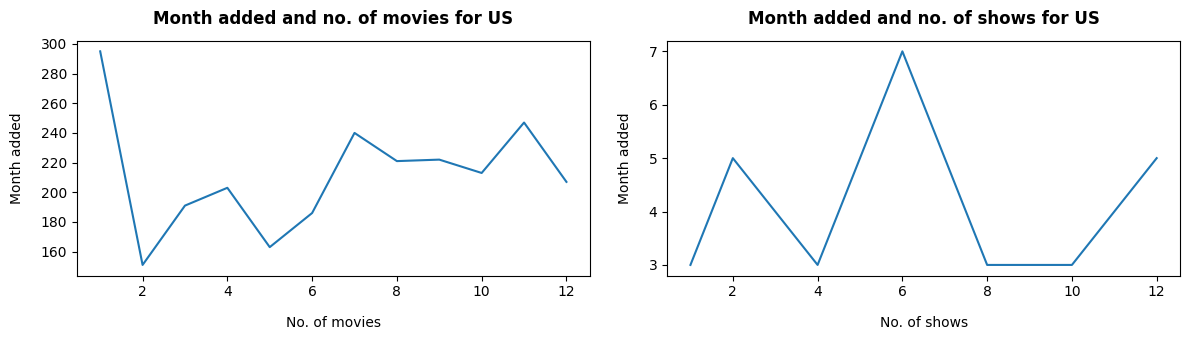

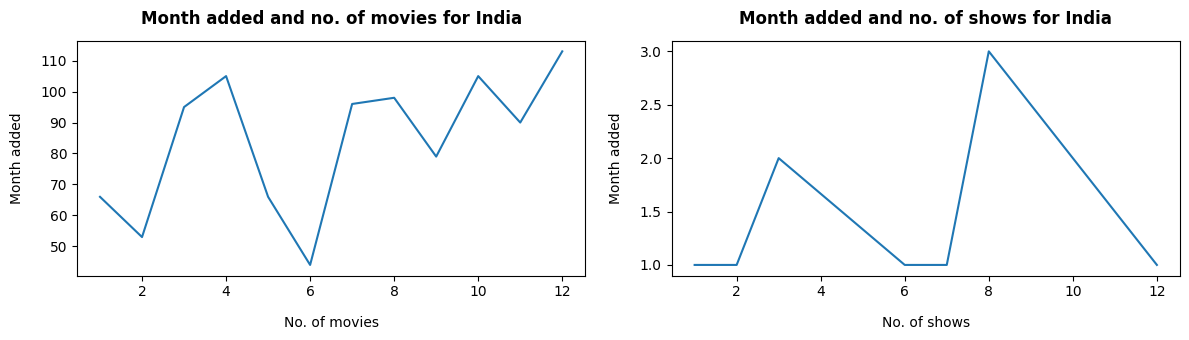

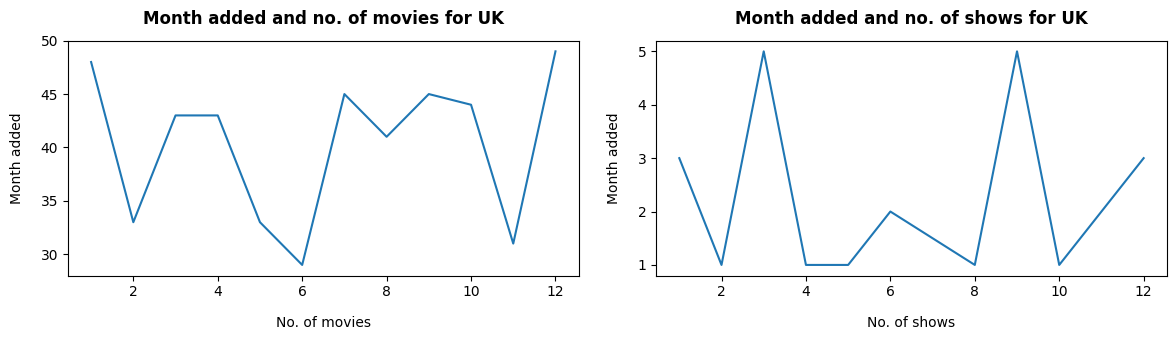

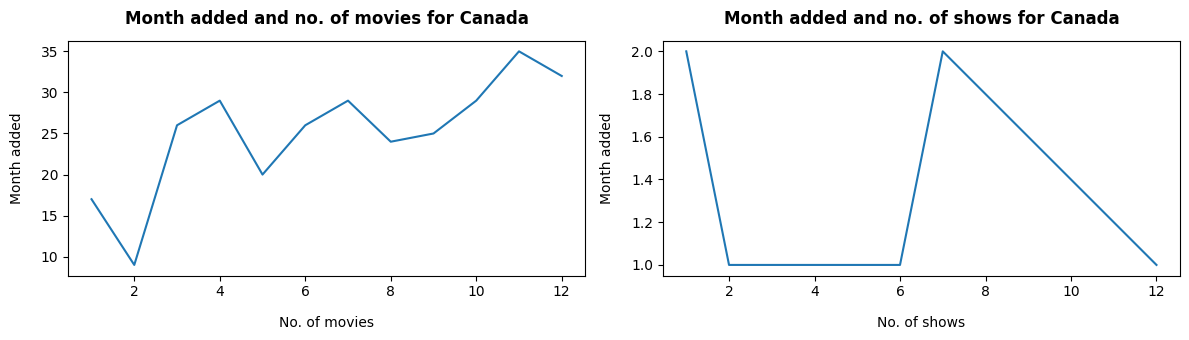

In [ ]:
## for US

plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
plt.plot(movies_month_added_US['Month_added'][::-1], movies_month_added_US['title'][::-1])

plt.title('Month added and no. of movies for US', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Month added', labelpad = 12)

plt.subplot(1,2,2)
plt.plot(shows_month_added_US['Month_added'][::-1], shows_month_added_US['title'][::-1])

plt.title('Month added and no. of shows for US', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Month added', labelpad = 12)

plt.tight_layout()
plt.show()


## for India
plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
plt.plot(movies_month_added_IND['Month_added'][::-1], movies_month_added_IND['title'][::-1])

plt.title('Month added and no. of movies for India', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Month added', labelpad = 12)

plt.subplot(1,2,2)
plt.plot(shows_month_added_IND['Month_added'][::-1], shows_month_added_IND['title'][::-1])

plt.title('Month added and no. of shows for India', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Month added', labelpad = 12)

plt.tight_layout()
plt.show()

## for UK
plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
plt.plot(movies_month_added_UK['Month_added'][::-1], movies_month_added_UK['title'][::-1])

plt.title('Month added and no. of movies for UK', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Month added', labelpad = 12)

plt.subplot(1,2,2)
plt.plot(shows_month_added_UK['Month_added'][::-1], shows_month_added_UK['title'][::-1])

plt.title('Month added and no. of shows for UK', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Month added', labelpad = 12)

plt.tight_layout()
plt.show()

## for Canada
plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
plt.plot(movies_month_added_Can['Month_added'][::-1], movies_month_added_Can['title'][::-1])

plt.title('Month added and no. of movies for Canada', fontweight = 'bold', pad = 12)
plt.xlabel('No. of movies', labelpad = 12)
plt.ylabel('Month added', labelpad = 12)

plt.subplot(1,2,2)
plt.plot(shows_month_added_Can['Month_added'][::-1], shows_month_added_Can['title'][::-1])

plt.title('Month added and no. of shows for Canada', fontweight = 'bold', pad = 12)
plt.xlabel('No. of shows', labelpad = 12)
plt.ylabel('Month added', labelpad = 12)

plt.tight_layout()
plt.show()

#### The graphs above shows the no. of movies added in which months of the year. Standalone it shows the trend but does not offer any business application. However, in combination with data on watching matrix, some meaningful insights can be drawn.

In [ ]:
movies_week_added_US = df_movies_US.groupby('Week_Added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Week_Added')
shows_week_added_US = df_shows_US.groupby('Week_Added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Week_Added')

movies_week_added_IND = df_movies_IND.groupby('Week_Added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Week_Added')
shows_week_added_IND = df_shows_IND.groupby('Week_Added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Week_Added')

movies_week_added_UK = df_movies_UK.groupby('Week_Added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Week_Added')
shows_week_added_UK = df_shows_UK.groupby('Week_Added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Week_Added')

movies_week_added_Can = df_movies_Can.groupby('Week_Added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Week_Added')
shows_week_added_Can = df_shows_Can.groupby('Week_Added').agg({'title': 'nunique'}).reset_index().sort_values(by = 'Week_Added')


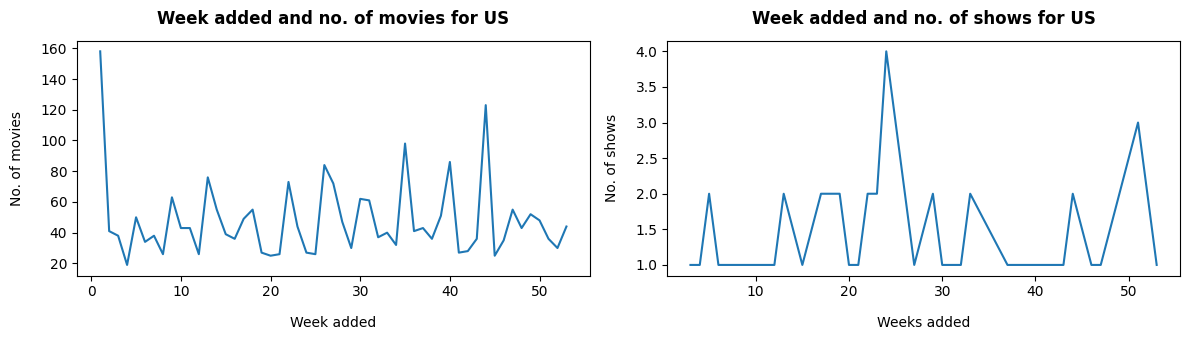

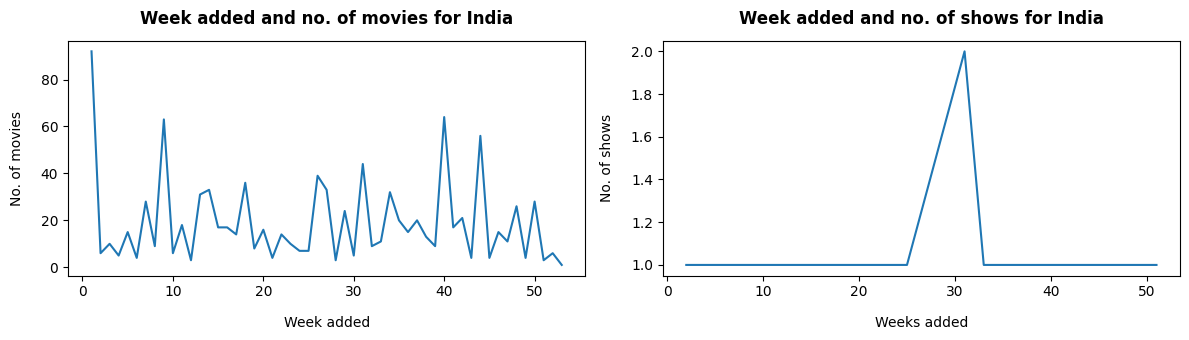

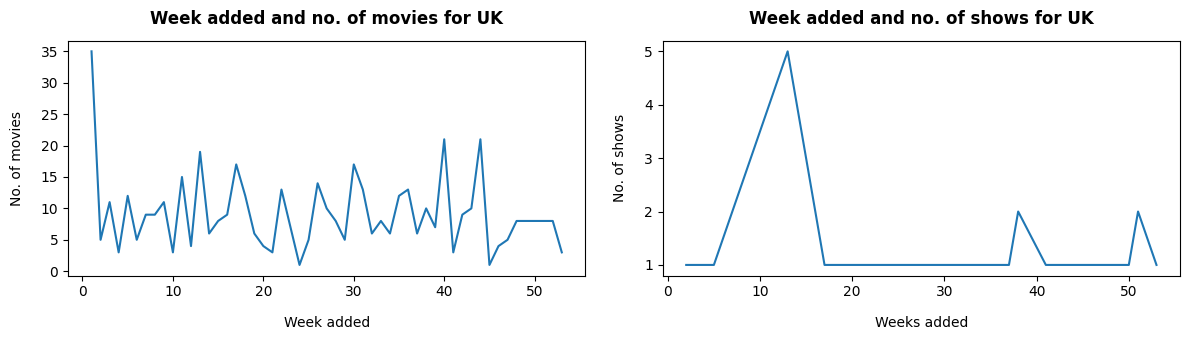

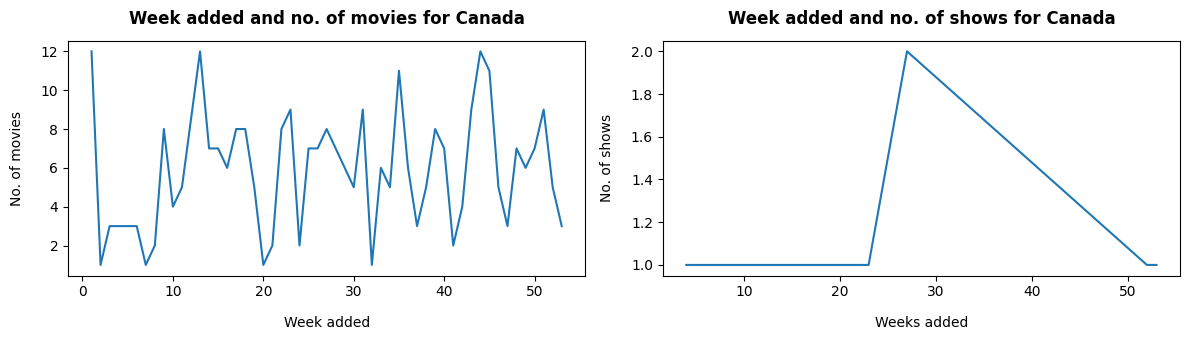

In [ ]:
## for US

plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
plt.plot(movies_week_added_US['Week_Added'][::-1], movies_week_added_US['title'][::-1])
plt.title('Week added and no. of movies for US', fontweight = 'bold', pad = 12)
plt.ylabel('No. of movies', labelpad = 12)
plt.xlabel('Week added', labelpad = 12)

plt.subplot(1,2,2)
plt.plot(shows_week_added_US['Week_Added'][::-1], shows_week_added_US['title'][::-1])
plt.title('Week added and no. of shows for US', fontweight = 'bold', pad = 12)
plt.ylabel('No. of shows', labelpad = 12)
plt.xlabel('Weeks added', labelpad = 12)

plt.tight_layout()
plt.show()

## for India
plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
plt.plot(movies_week_added_IND['Week_Added'][::-1], movies_week_added_IND['title'][::-1])
plt.title('Week added and no. of movies for India', fontweight = 'bold', pad = 12)
plt.ylabel('No. of movies', labelpad = 12)
plt.xlabel('Week added', labelpad = 12)

plt.subplot(1,2,2)
plt.plot(shows_week_added_IND['Week_Added'][::-1], shows_week_added_IND['title'][::-1])
plt.title('Week added and no. of shows for India', fontweight = 'bold', pad = 12)
plt.ylabel('No. of shows', labelpad = 12)
plt.xlabel('Weeks added', labelpad = 12)

plt.tight_layout()
plt.show()

## for UK
plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
plt.plot(movies_week_added_UK['Week_Added'][::-1], movies_week_added_UK['title'][::-1])
plt.title('Week added and no. of movies for UK', fontweight = 'bold', pad = 12)
plt.ylabel('No. of movies', labelpad = 12)
plt.xlabel('Week added', labelpad = 12)

plt.subplot(1,2,2)
plt.plot(shows_week_added_UK['Week_Added'][::-1], shows_week_added_UK['title'][::-1])
plt.title('Week added and no. of shows for UK', fontweight = 'bold', pad = 12)
plt.ylabel('No. of shows', labelpad = 12)
plt.xlabel('Weeks added', labelpad = 12)

plt.tight_layout()
plt.show()

## for Canada
plt.figure(figsize = (12, 3.5))
plt.subplot(1,2,1)
plt.plot(movies_week_added_Can['Week_Added'][::-1], movies_week_added_Can['title'][::-1])
plt.title('Week added and no. of movies for Canada', fontweight = 'bold', pad = 12)
plt.ylabel('No. of movies', labelpad = 12)
plt.xlabel('Week added', labelpad = 12)

plt.subplot(1,2,2)
plt.plot(shows_week_added_Can['Week_Added'][::-1], shows_week_added_Can['title'][::-1])
plt.title('Week added and no. of shows for Canada', fontweight = 'bold', pad = 12)
plt.ylabel('No. of shows', labelpad = 12)
plt.xlabel('Weeks added', labelpad = 12)

plt.tight_layout()
plt.show()

#### The graphs above shows the trend for week of the year and the no. of movies and shows added. Apart from the trend it does not offer any business applicable insights in isolation. however, in combination with watching matrix, it can offer valuable insights from business point of view.

In [ ]:
df_movies['actor_director'] = df_movies['cast'] + ' and ' + df_movies['director']
df_shows['actor_director'] = df_shows.cast.str.cat(df_shows.director, sep = ' and ')

<ipython-input-114-02bd0696793a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['actor_director'] = df_movies['cast'] + ' and ' + df_movies['director']
<ipython-input-114-02bd0696793a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shows['actor_director'] = df_shows.cast.str.cat(df_shows.director, sep = ' and ')


In [ ]:
df_movies_US['actor_director'] = df_movies_US['cast'] + ' and ' + df_movies_US['director']
df_movies_US = df_movies_US[df_movies_US['cast'] != 'Unknown actor']
df_movies_US = df_movies_US[df_movies_US['director'] != 'Unknown director']

df_shows_US['actor_director'] = df_shows_US.cast.str.cat(df_shows_US.director, sep = ' and ')
df_shows_US = df_shows_US[df_shows_US['cast'] != 'Unknown actor']
df_shows_US = df_shows_US[df_shows_US['director'] != 'Unknown director']

df_movies_IND['actor_director'] = df_movies_IND['cast'] + ' and ' + df_movies_IND['director']
df_movies_IND = df_movies_IND[df_movies_IND['cast'] != 'Unknown actor']
df_movies_IND = df_movies_IND[df_movies_IND['director'] != 'Unknown director']

df_shows_IND['actor_director'] = df_shows_IND.cast.str.cat(df_shows_IND.director, sep = ' and ')
df_shows_IND = df_shows_IND[df_shows_IND['cast'] != 'Unknown actor']
df_shows_IND = df_shows_IND[df_shows_IND['director'] != 'Unknown director']

df_movies_UK['actor_director'] = df_movies_UK['cast'] + ' and ' + df_movies_UK['director']
df_movies_UK = df_movies_UK[df_movies_UK['cast'] != 'Unknown actor']
df_movies_UK = df_movies_UK[df_movies_UK['director'] != 'Unknown director']

df_shows_UK['actor_director'] = df_shows_UK.cast.str.cat(df_shows_UK.director, sep = ' and ')
df_shows_UK = df_shows_UK[df_shows_UK['cast'] != 'Unknown actor']
df_shows_UK = df_shows_UK[df_shows_UK['director'] != 'Unknown director']

df_movies_Can['actor_director'] = df_movies_Can['cast'] + ' and ' + df_movies_Can['director']
df_movies_Can = df_movies_Can[df_movies_Can['cast'] != 'Unknown actor']
df_movies_Can = df_movies_Can[df_movies_Can['director'] != 'Unknown director']

df_shows_Can['actor_director'] = df_shows_Can.cast.str.cat(df_shows_Can.director, sep = ' and ')
df_shows_Can = df_shows_Can[df_shows_Can['cast'] != 'Unknown actor']
df_shows_Can = df_shows_Can[df_shows_Can['director'] != 'Unknown director']


<ipython-input-115-69233f9d3b04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_US['actor_director'] = df_movies_US['cast'] + ' and ' + df_movies_US['director']
<ipython-input-115-69233f9d3b04>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shows_US['actor_director'] = df_shows_US.cast.str.cat(df_shows_US.director, sep = ' and ')
<ipython-input-115-69233f9d3b04>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [ ]:
df_movies_US.head()

show_id   type                             title       director  \
6      s7  Movie  My Little Pony: A New Generation  Robert Cullen   
6      s7  Movie  My Little Pony: A New Generation  Robert Cullen   
6      s7  Movie  My Little Pony: A New Generation  Robert Cullen   
6      s7  Movie  My Little Pony: A New Generation  Robert Cullen   
6      s7  Movie  My Little Pony: A New Generation  Robert Cullen   

              cast        country          date_added  release_year rating  \
6  Vanessa Hudgens  United States  September 24, 2021          2021     PG   
6     Kimiko Glenn  United States  September 24, 2021          2021     PG   
6    James Marsden  United States  September 24, 2021          2021     PG   
6       Liza Koshy  United States  September 24, 2021          2021     PG   
6        Ken Jeong  United States  September 24, 2021          2021     PG   

  duration                 listed_in  \
6   90-120  Children & Family Movies   
6   90-120  Children & Family Movies   
6   90-120  Children & Family Movies   
6   90-120  Children & Family Movies   
6   90-120  Children & Family Movies   

                                         description new_date_added  \
6  Equestria's divided. But a bright-eyed hero be...     2021-09-24   
6  Equestria's divided. But a bright-eyed hero be...     2021-09-24   
6  Equestria's divided. But a bright-eyed hero be...     2021-09-24   
6  Equestria's divided. But a bright-eyed hero be...     2021-09-24   
6  Equestria's divided. But a bright-eyed hero be...     2021-09-24   

   Week_Added  Month_added  Year_added                     actor_director  
6          38            9        2021  Vanessa Hudgens and Robert Cullen  
6          38            9        2021     Kimiko Glenn and Robert Cullen  
6          38            9        2021    James Marsden and Robert Cullen  
6          38            9        2021       Liza Koshy and Robert Cullen  
6          38            9        2021        Ken Jeong and Robert Cullen

In [ ]:
actor_director_movies_US = df_movies_US.groupby('actor_director').agg({'title': 'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:20]
actor_director_shows_US = df_shows_US.groupby('actor_director').agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:20]

actor_director_movies_IND = df_movies_IND.groupby('actor_director').agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:20]
actor_director_shows_IND = df_shows_IND.groupby('actor_director').agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:20]

actor_director_movies_UK = df_movies_UK.groupby('actor_director').agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:20]
actor_director_shows_UK = df_shows_UK.groupby('actor_director').agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:20]

actor_director_movies_Can = df_movies_Can.groupby('actor_director').agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:20]
actor_director_shows_Can = df_shows_Can.groupby('actor_director').agg({'title':'nunique'}).reset_index().sort_values(by = 'title', ascending = False)[:20]


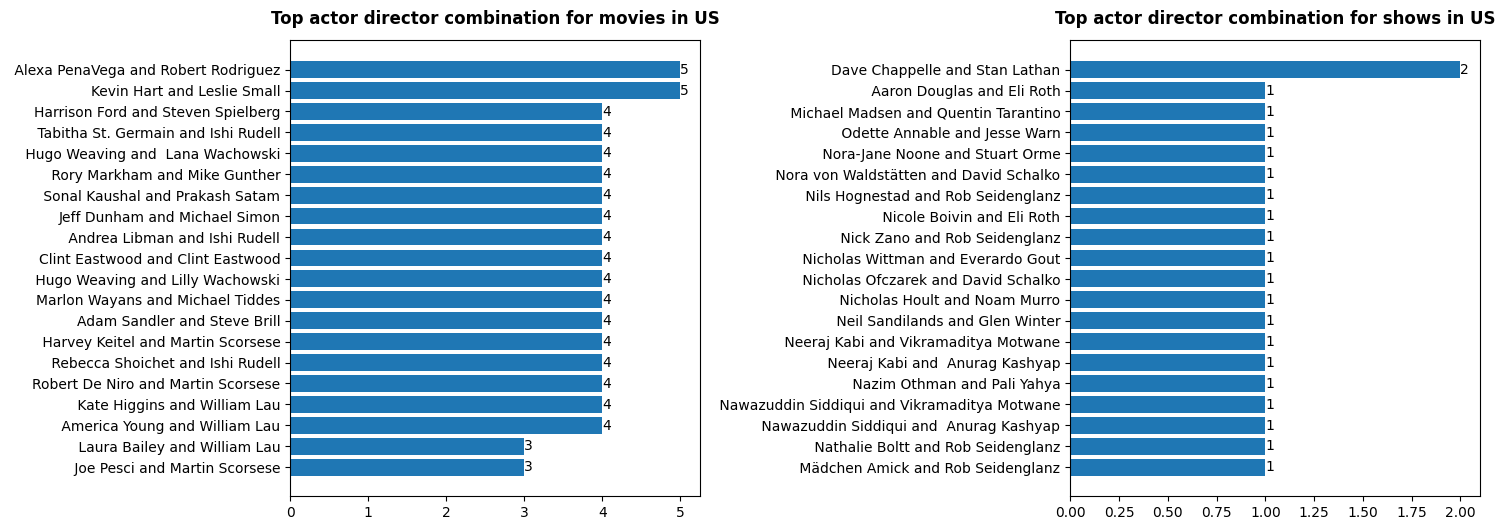

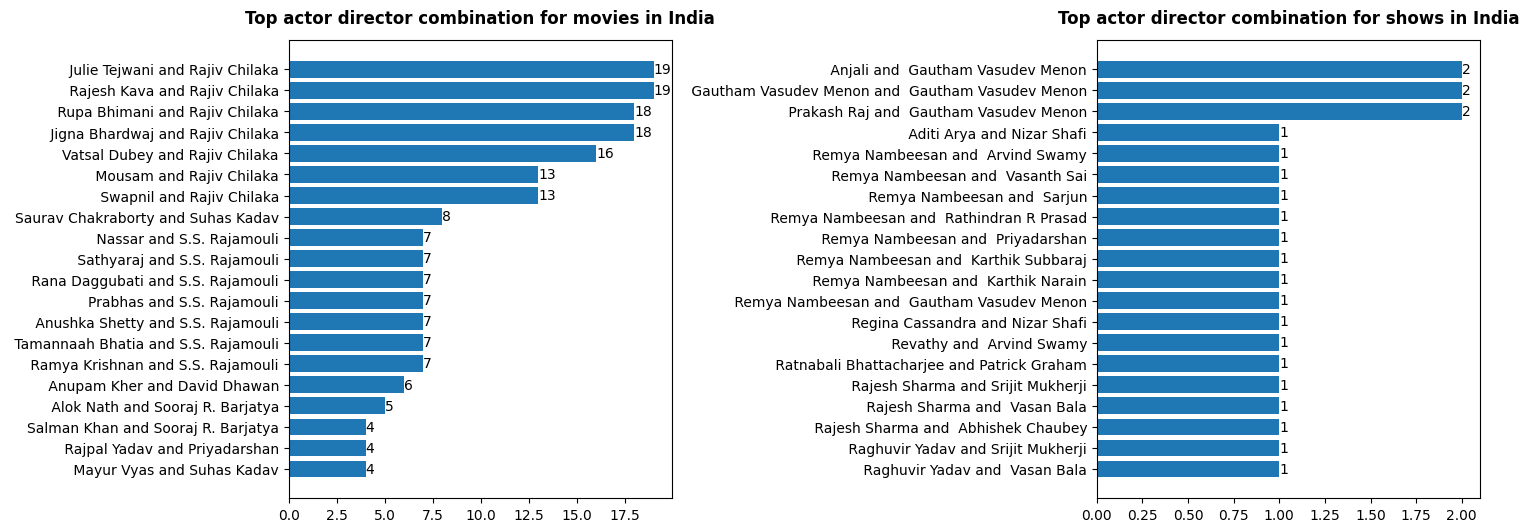

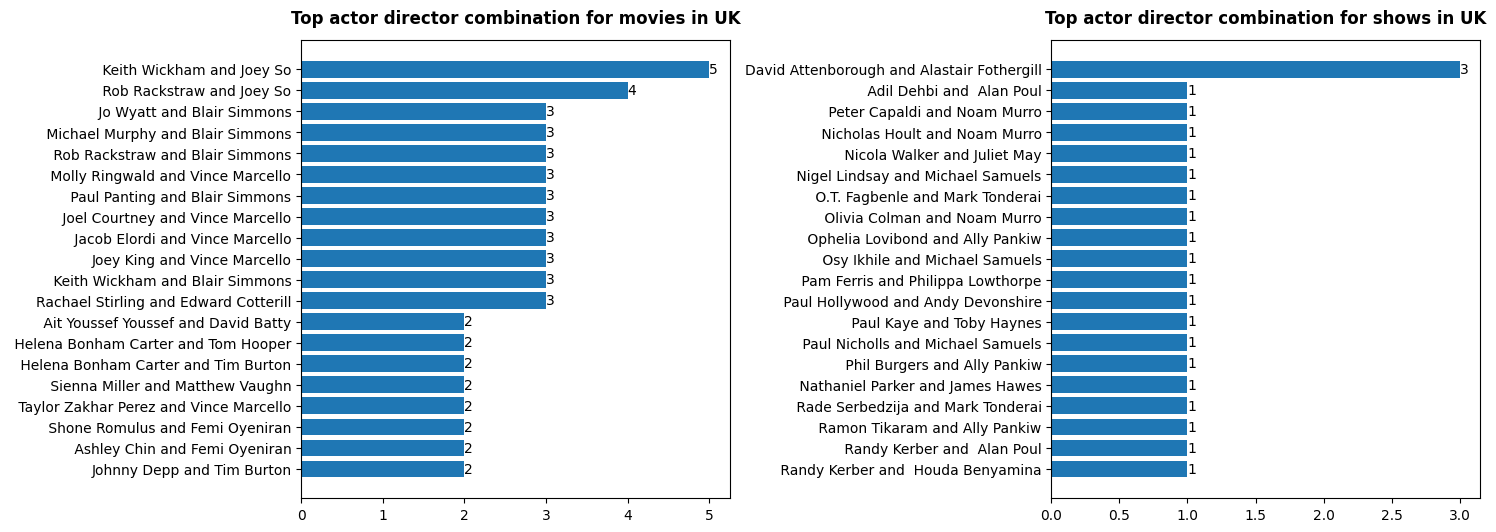

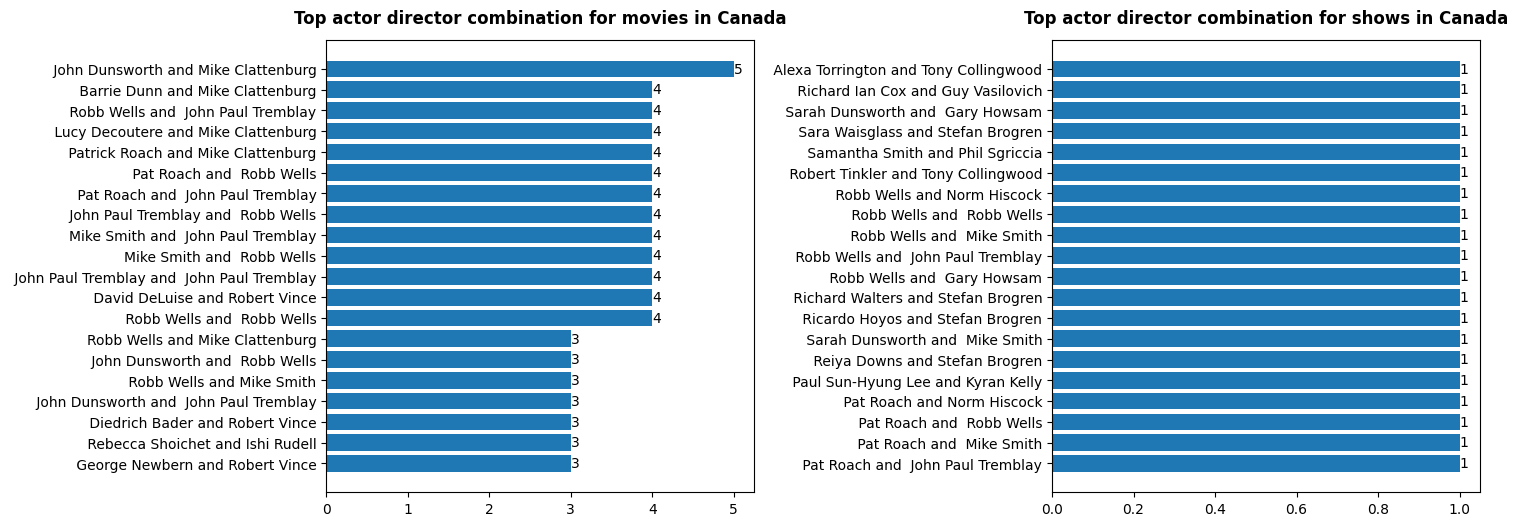

In [ ]:
## for US
plt.figure(figsize = (15, 20))
plt.subplot(4,2,1)
plt.barh(actor_director_movies_US['actor_director'][::-1], actor_director_movies_US['title'][::-1])
for i, value in enumerate(actor_director_movies_US['title'][::-1]):
  plt.text(value, i, str(value), ha = 'left', va = 'center')
plt.title('Top actor director combination for movies in US', fontweight = 'bold', pad = 12)


plt.subplot(4,2,2)
plt.barh(actor_director_shows_US['actor_director'][::-1], actor_director_shows_US['title'][::-1])
for i, value in enumerate(actor_director_shows_US['title'][::-1]):
  plt.text(value, i, str(value), ha = 'left', va = 'center')

plt.title('Top actor director combination for shows in US', fontweight = 'bold', pad = 12)
plt.tight_layout()
plt.show()


## for India
plt.figure(figsize = (15, 20))
plt.subplot(4,2,3)
plt.barh(actor_director_movies_IND['actor_director'][::-1], actor_director_movies_IND['title'][::-1])
for i, value in enumerate(actor_director_movies_IND['title'][::-1]):
  plt.text(value, i, str(value), ha = 'left', va = 'center')

plt.title('Top actor director combination for movies in India', fontweight = 'bold', pad = 12)

plt.subplot(4,2,4)
plt.barh(actor_director_shows_IND['actor_director'][::-1], actor_director_shows_IND['title'][::-1])
for i, value in enumerate(actor_director_shows_IND['title'][::-1]):
  plt.text(value, i, str(value), ha = 'left', va = 'center')

plt.title('Top actor director combination for shows in India', fontweight = 'bold', pad = 12)
plt.tight_layout()
plt.show()

## for UK
plt.figure(figsize = (15, 20))
plt.subplot(4,2,5)
plt.barh(actor_director_movies_UK['actor_director'][::-1], actor_director_movies_UK['title'][::-1])
for i, value in enumerate(actor_director_movies_UK['title'][::-1]):
  plt.text(value, i, str(value), ha = 'left', va = 'center')

plt.title('Top actor director combination for movies in UK', fontweight = 'bold', pad = 12)

plt.subplot(4,2,6)
plt.barh(actor_director_shows_UK['actor_director'][::-1], actor_director_shows_UK['title'][::-1])
for i, value in enumerate(actor_director_shows_UK['title'][::-1]):
  plt.text(value, i, str(value), ha = 'left', va = 'center')

plt.title('Top actor director combination for shows in UK', fontweight = 'bold', pad = 12)

plt.tight_layout()
plt.show()

## for Canada
plt.figure(figsize = (15, 20))
plt.subplot(4,2,7)
plt.barh(actor_director_movies_Can['actor_director'][::-1], actor_director_movies_Can['title'][::-1])
for i, value in enumerate(actor_director_movies_Can['title'][::-1]):
  plt.text(value, i, str(value), ha = 'left', va = 'center')

plt.title('Top actor director combination for movies in Canada', fontweight = 'bold', pad = 12)

plt.subplot(4,2,8)
plt.barh(actor_director_shows_Can['actor_director'][::-1], actor_director_shows_Can['title'][::-1])
for i, value in enumerate(actor_director_shows_Can['title'][::-1]):
  plt.text(value, i, str(value), ha = 'left', va = 'center')

plt.title('Top actor director combination for shows in Canada', fontweight = 'bold', pad = 12)
plt.tight_layout()
plt.show()

#### The above graph shows the actor - director combination who are most popular as per the no. of content on Netflix. Netflix or other OTT platforms may take a guide for adding the movie from the point of view of the star or artist attraction of audiance. Filmmaker also consider to cast some artist based on this insight.

## **Conclusion**


1. It is recommended to add focus on R and TV-MA rated movies while considering to add content for US, UK and Canada. For India the focus should be on movies with rating TV-14.

2. while considering to add more TV shows Netflix can adopt various approches:

      i. When considering for global audiance TV shows with rating TV-MA should be preffered as it.
      ii. When considering country specific audiance, it is recommended to add TV shows specific to countries like TV-MA rating shows for US, India, and UK. while for Camada It shold focus on adding more TV shows with Tv-Y rating.

3. Additionally, Netflix can experiment adding TV shows with TV-Y rating in India. Since, This TV shows with rating TV-Y is not available in India, it is unknown how would Indians react to such content. So, There is a scope of experimentation

4. Netflix or OTT platforms in general are recommended to add content of length 90-120 minutes for US, Uk, and Canadians while for India longer format movies are recommended (120-150 minutes). However, for global audiance, the movies with length 90-120 minutes should be preffered.

5. It is recommended that for India shorter format of TV shows should be preffered to produce or to be added for OTT audiance while for US, UK, and canada, longer format would also work.

6. For global audiance, TV shows preferably of one season should be focussed.

7. In India, documentry type zenre are not very popular both in movies as well as TV Shows. while other countries US, UK, and Canada there are considerable no. of documetry Zenre contents. So, While adding contnets on Netflix or on OTT platforms in general, this maybe cared.

8. Short length of movies are not very prevalent in India on Netflix while in rest of the countries US, UK, and Canada, a good number of short length content were present.

#### ***There is not enough data presnet to provide a lot of business apllicable insights. For example, if data on watching indecies were present or cost and revenue indices were present, a robust analysis could have been done and a lot of business insights could have been drawn***